In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import collections
from array import array

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_detsys_all_MC/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')


Welcome to JupyROOT 6.10/08


In [2]:
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"Detector_systematic.root","RECREATE");


In [3]:
#!jupyter nbconvert --to script numuCCana_muon_cut_weight.ipynb

In [4]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# CRTinBNB tagger, Overlay or MC

In [5]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
f_cv = ROOT.TFile.Open(path+"xsec_detsys_CV/xsec_detsys_CV.root", 'read')
f_sce = ROOT.TFile.Open(path+"xsec_detsys_SCE/xsec_detsys_SCE.root", 'read')
f_lydown = ROOT.TFile.Open(path+"xsec_detsys_LYdown/xsec_detsys_LYdown.root", 'read')
f_wireanglexz = ROOT.TFile.Open(path+"xsec_detsys_WireAngleXZ/xsec_detsys_WireAngleXZ.root", 'read')
f_wireangleyz = ROOT.TFile.Open(path+"xsec_detsys_WireAngleYZ/xsec_detsys_WireAngleYZ.root", 'read')
f_wiremodx = ROOT.TFile.Open(path+"xsec_detsys_WireModX/xsec_detsys_WireModX.root", 'read')
f_wiremodyz = ROOT.TFile.Open(path+"xsec_detsys_WireModYZ/xsec_detsys_WireModYZ.root", 'read')

f_lyatt = ROOT.TFile.Open(path+"xsec_detsys_LYAtt/xsec_detsys_LYAtt.root", 'read')
f_lyray = ROOT.TFile.Open(path+"xsec_detsys_LYRay/xsec_detsys_LYRayleigh.root", 'read')

f_dedx = ROOT.TFile.Open(path+"xsec_detsys_dEdx/xsec_detsys_dEdx.root", 'read')
f_recomb2 = ROOT.TFile.Open(path+"xsec_detsys_recomb2/xsec_detsys_recomb2.root", 'read')


In [6]:
pot_data =     7.644e+18 
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/30.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [7]:
def plot_detsys_histo(name):
    files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_dedx,f_recomb2]
    name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh','dEdx', 'recomb2' ]
    h_files = []
    i = 0
    legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
    for x in files:
        h_files.append(x.Get(name))
        h_files[i].SetLineColor(i+1)
        h_files[i].SetLineWidth(4)
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        if (i+1)==10:
            h_files[i].SetLineColor(30)
        legend.AddEntry(h_files[i],name_files[i],"f")
        if i == 0:
            h_files[i].SetMaximum(h_files[i].GetMaximum()*1.5)
            h_files[i].Draw('hist')
            legend.Draw()
        else:
            h_files[i].Draw("hist same")
        i+=1
    h_files[0].Draw("hist same")
    c1.Draw()
    del h_files[:]

    c1.SaveAs(outputdir_png + 'h_'+name+'.png')
    c1.SaveAs(outputdir_root + 'h_'+name+'.root')
    return

#h_files.clear()

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_xsec_detsys_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_xsec_detsys_all.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_xsec_detsys_all.pdf has been created


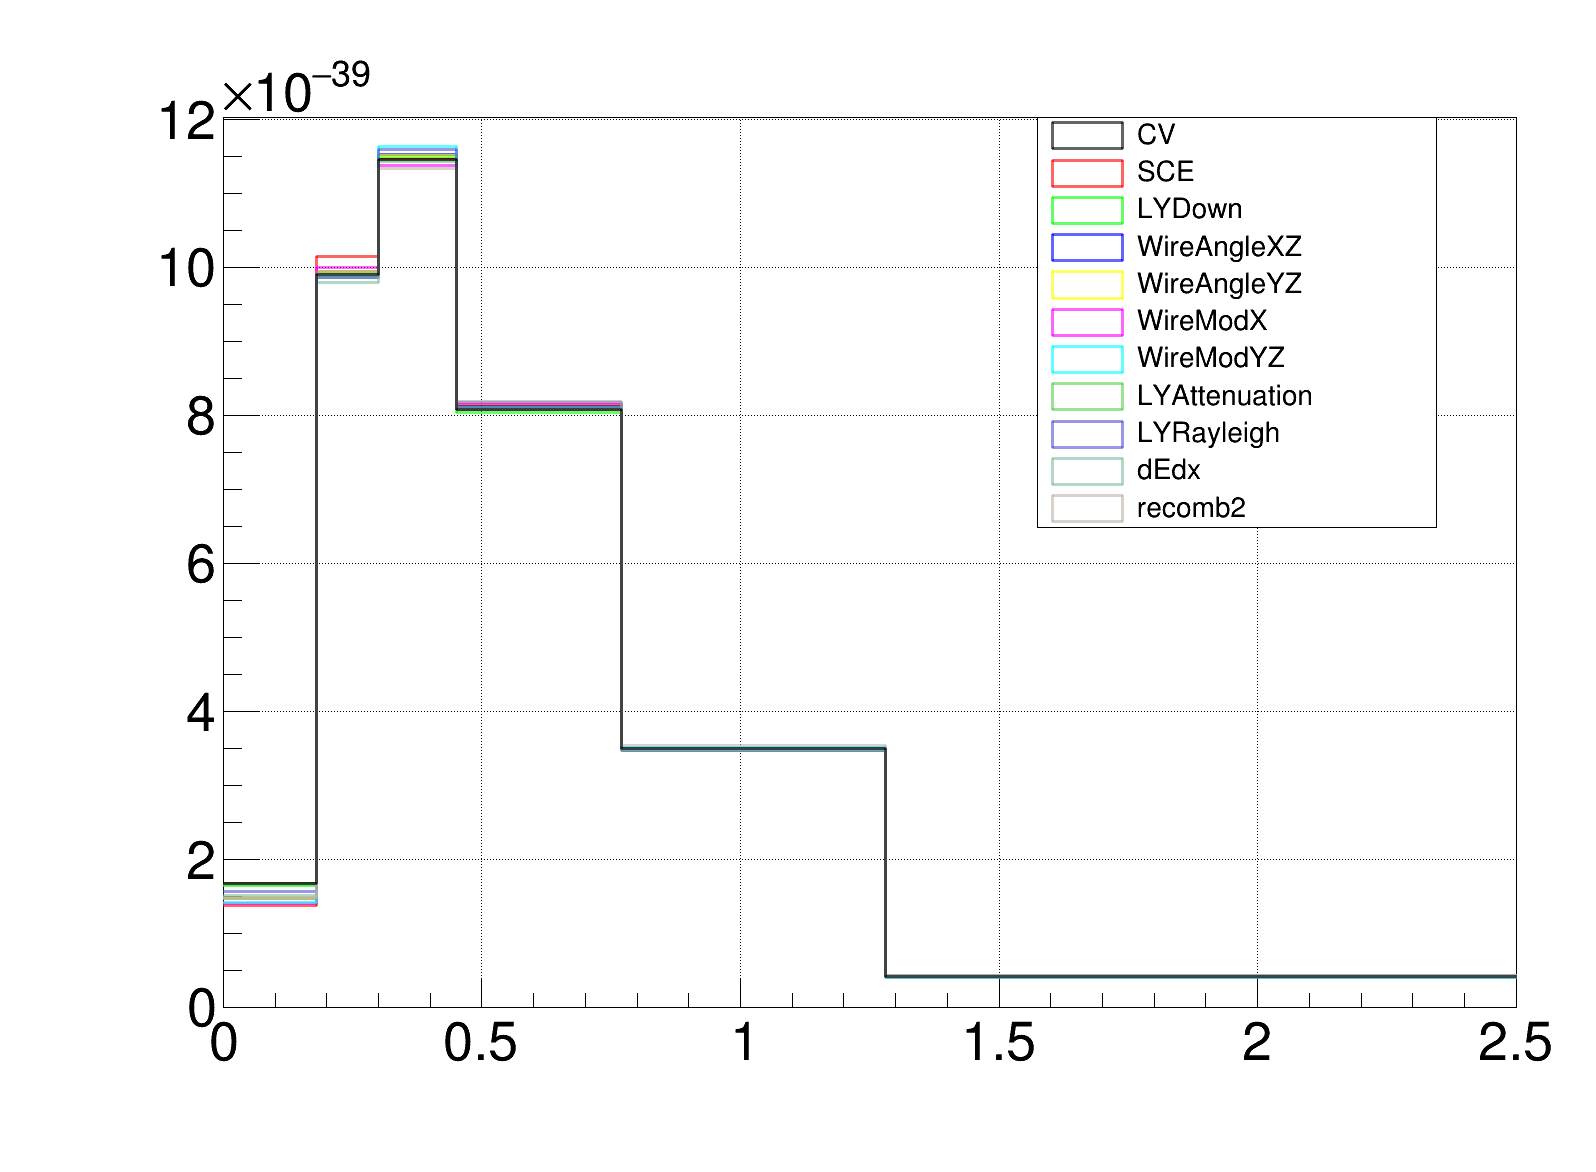

In [8]:
files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_dedx,f_recomb2]
name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh','dEdx', 'recomb2' ]
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
for x in files:
    h_files.append(x.Get('h_xsec_MC'))
    h_files[i].SetLineColorAlpha(i+1,0.6)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.6)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        h_files[i].Draw('hist')
    else:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        h_files[i].Draw("hist same")
    i+=1
h_files[0].Draw("hist same")
legend.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_all.png")
c1.SaveAs(outputdir_root + "h_xsec_detsys_all.root")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_all.pdf")

#h_files.clear()

In [9]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_dedx,f_recomb2]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh','dEdx', 'recomb2' ]
num_file = 12
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
for x in files:
    h_files.append(x.Get('h_xsec_MC'))
num_bins = h_files[0].GetNbinsX()

xsec_diff_matrix = np.zeros((num_bins))

xsec_cov_matrix = np.zeros((num_bins,num_bins))

for f in range(1,num_file-1):
    xsec_diff_matrix = np.zeros((num_bins))
    print name_files[f]
    for b in range(num_bins):
        xsec_diff_matrix[b]= (h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1) )/(h_files[0].GetBinContent(b+1) + 1e-100)
    #print np.matmul(xsec_diff_matrix,np.transpose(xsec_diff_matrix))
    xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix
np.save(output_filedir+'frac_covariance_detsys',xsec_cov_matrix)

SCE
LYDown
WireAngleXZ
WireAngleYZ
WireModX
WireModYZ
LYAttenuation
LYRayleigh
dEdx
recomb2


In [10]:
RootFile = ROOT.TFile(output_filedir+"Detector_systematic.root","RECREATE");

580

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_frac_covariance_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_frac_covariance_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_frac_covariance_detsys.pdf has been created


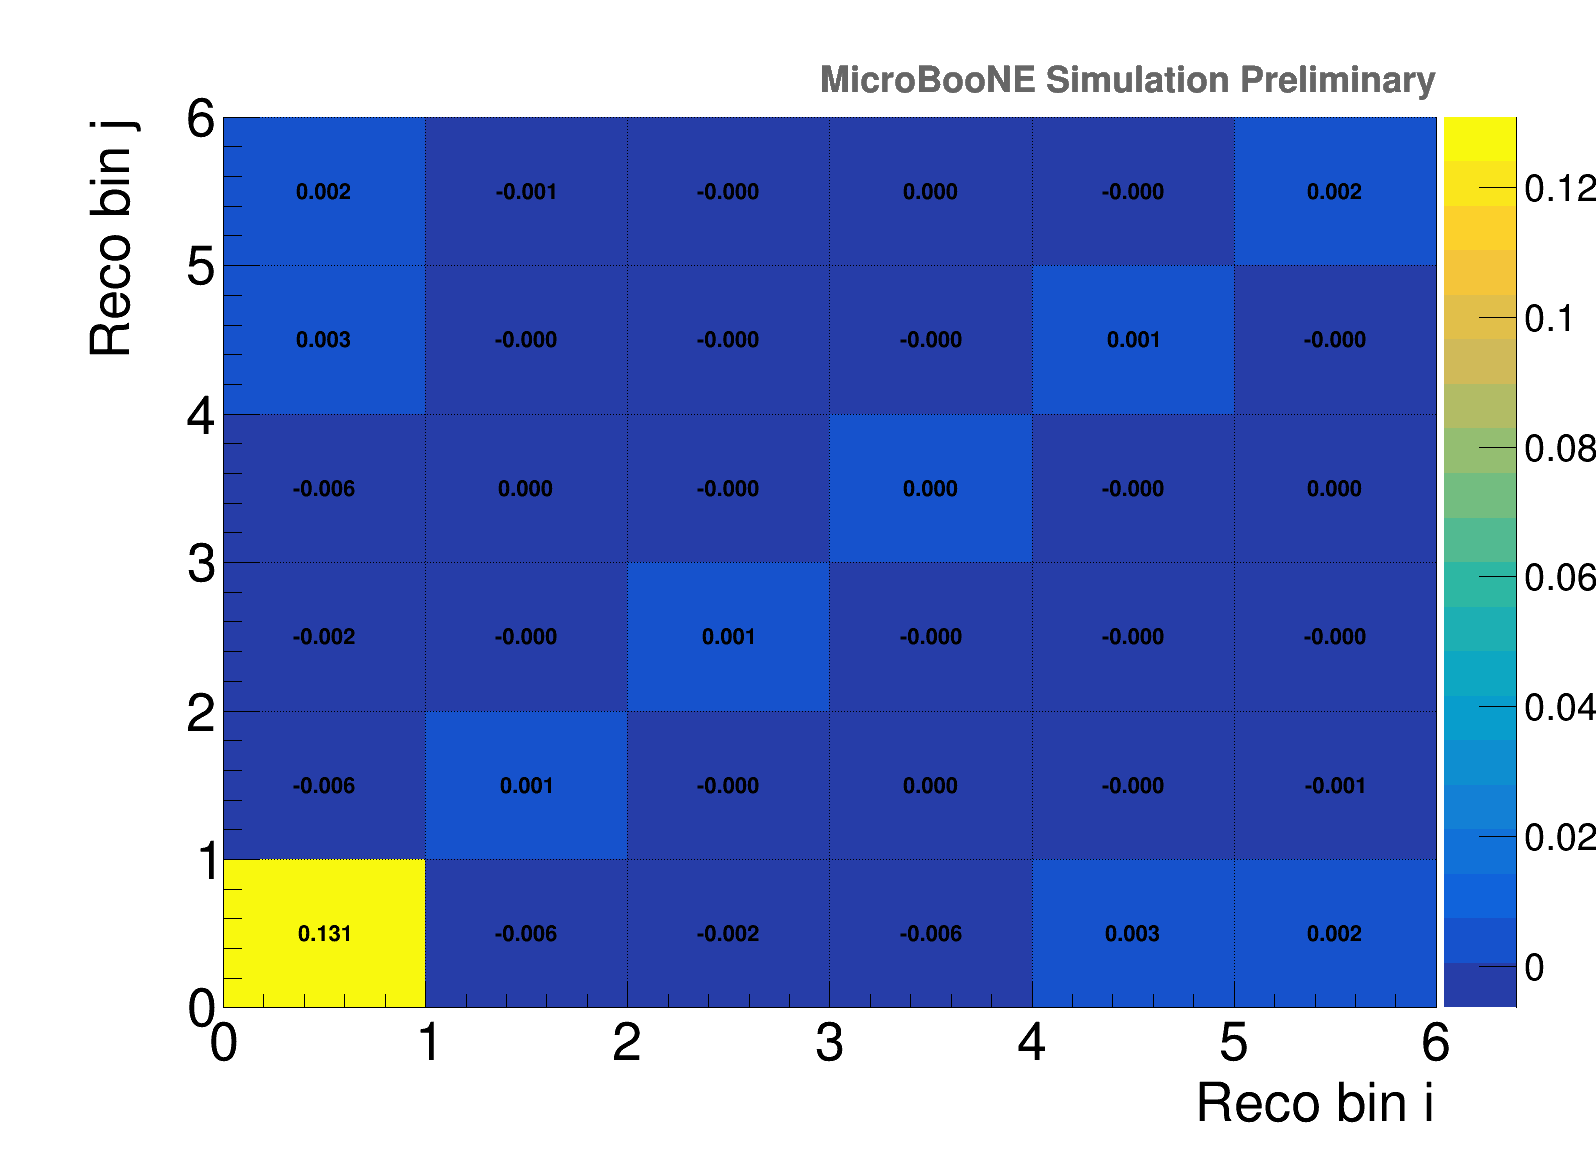

In [11]:
ROOT.gStyle.SetPaintTextFormat('0.6f')
h_covariance = ROOT.TH2F("h_covariance",'Covariance matrix',6,0,6,6,0,6)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_covariance.Draw('colz')
c1.SetLogz(0)
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_covariance_detsys.png")
c1.SaveAs(outputdir_root + "h_frac_covariance_detsys.root")
c1.SaveAs(outputdir_pdf + "h_frac_covariance_detsys.pdf")
h_covariance.Write('h_frac_covariance')

In [12]:
quad_sum = 0.1
for i in range(num_bins):
    quad_sum = quad_sum+xsec_cov_matrix[i,i]
    print i, ' - ', xsec_cov_matrix[i,i], ' sqrt: ', math.sqrt(xsec_cov_matrix[i,i])
    
print 'Qad sum: ', quad_sum,' sqrt: ', math.sqrt(quad_sum)
print 'Qad sum: ', quad_sum/num_bins,' sqrt: ', math.sqrt(quad_sum/num_bins)
    

0  -  0.13077199403504824  sqrt:  0.361624105993
1  -  0.0009051562092761044  sqrt:  0.030085814087
2  -  0.0006336208134169144  sqrt:  0.0251718257863
3  -  0.0004868009738537973  sqrt:  0.0220635666621
4  -  0.0005137598521237404  sqrt:  0.0226662712444
5  -  0.0024019001192124674  sqrt:  0.0490091840292
Qad sum:  0.23571323200293126  sqrt:  0.485503071054
Qad sum:  0.03928553866715521  sqrt:  0.198205798773


In [13]:
quad_sum = 0.0
for f in range(1,num_file-1):
    for b in range(1):
        err = h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1)
        print err, err/h_files[0].GetBinContent(b+1)
        quad_sum = quad_sum + err*err
print quad_sum , quad_sum/h_files[0].GetBinContent(1)/h_files[0].GetBinContent(1)
print math.sqrt(quad_sum), math.sqrt(quad_sum)/h_files[0].GetBinContent(1)
print h_files[0].GetBinContent(1)

2.98095419719e-40 0.178016701409
2.30597675289e-41 0.0137708380579
2.00720590731e-40 0.119866375339
1.92343628512e-40 0.11486381883
2.58843648435e-40 0.154576318276
2.52755006607e-40 0.150940301543
1.198110187e-41 0.00715487757628
9.87060625286e-41 0.0589453124673
1.60323958602e-40 0.0957423039041
1.83142702795e-40 0.109369207583
3.66694041679e-79 0.130771994035
6.0555267457e-40 0.361624105993
1.67453625059e-39


In [14]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ' ,'LYAttenuation', 'LYRayleigh' ]
#num_file = 7
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
for x in files:
    h_files.append(x.Get('h_xsec_MC'))
num_bins = h_files[0].GetNbinsX()
xsec_diff_matrix = np.zeros((num_bins))
xsec_cov_matrix = np.zeros((num_bins,num_bins))
for f in range(1,num_file-1):
    xsec_diff_matrix = np.zeros((num_bins))
    for b in range(num_bins):
        xsec_diff_matrix[b]= (h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1) )
    #print np.matmul(xsec_diff_matrix,np.transpose(xsec_diff_matrix))
    xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix
    
xsec_corr_matrix = np.zeros((num_bins,num_bins))
for i in range(num_bins):
    for j in range(num_bins):
        xsec_corr_matrix[i][j] = xsec_cov_matrix[i][j]/(math.sqrt(xsec_cov_matrix[i][i]*xsec_cov_matrix[j][j]))

np.save(output_filedir+'correlation_detsys',xsec_corr_matrix)
np.save(output_filedir+'covariance_detsys',xsec_cov_matrix)

677

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_correlation_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_correlation_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_correlation_detsys.pdf has been created


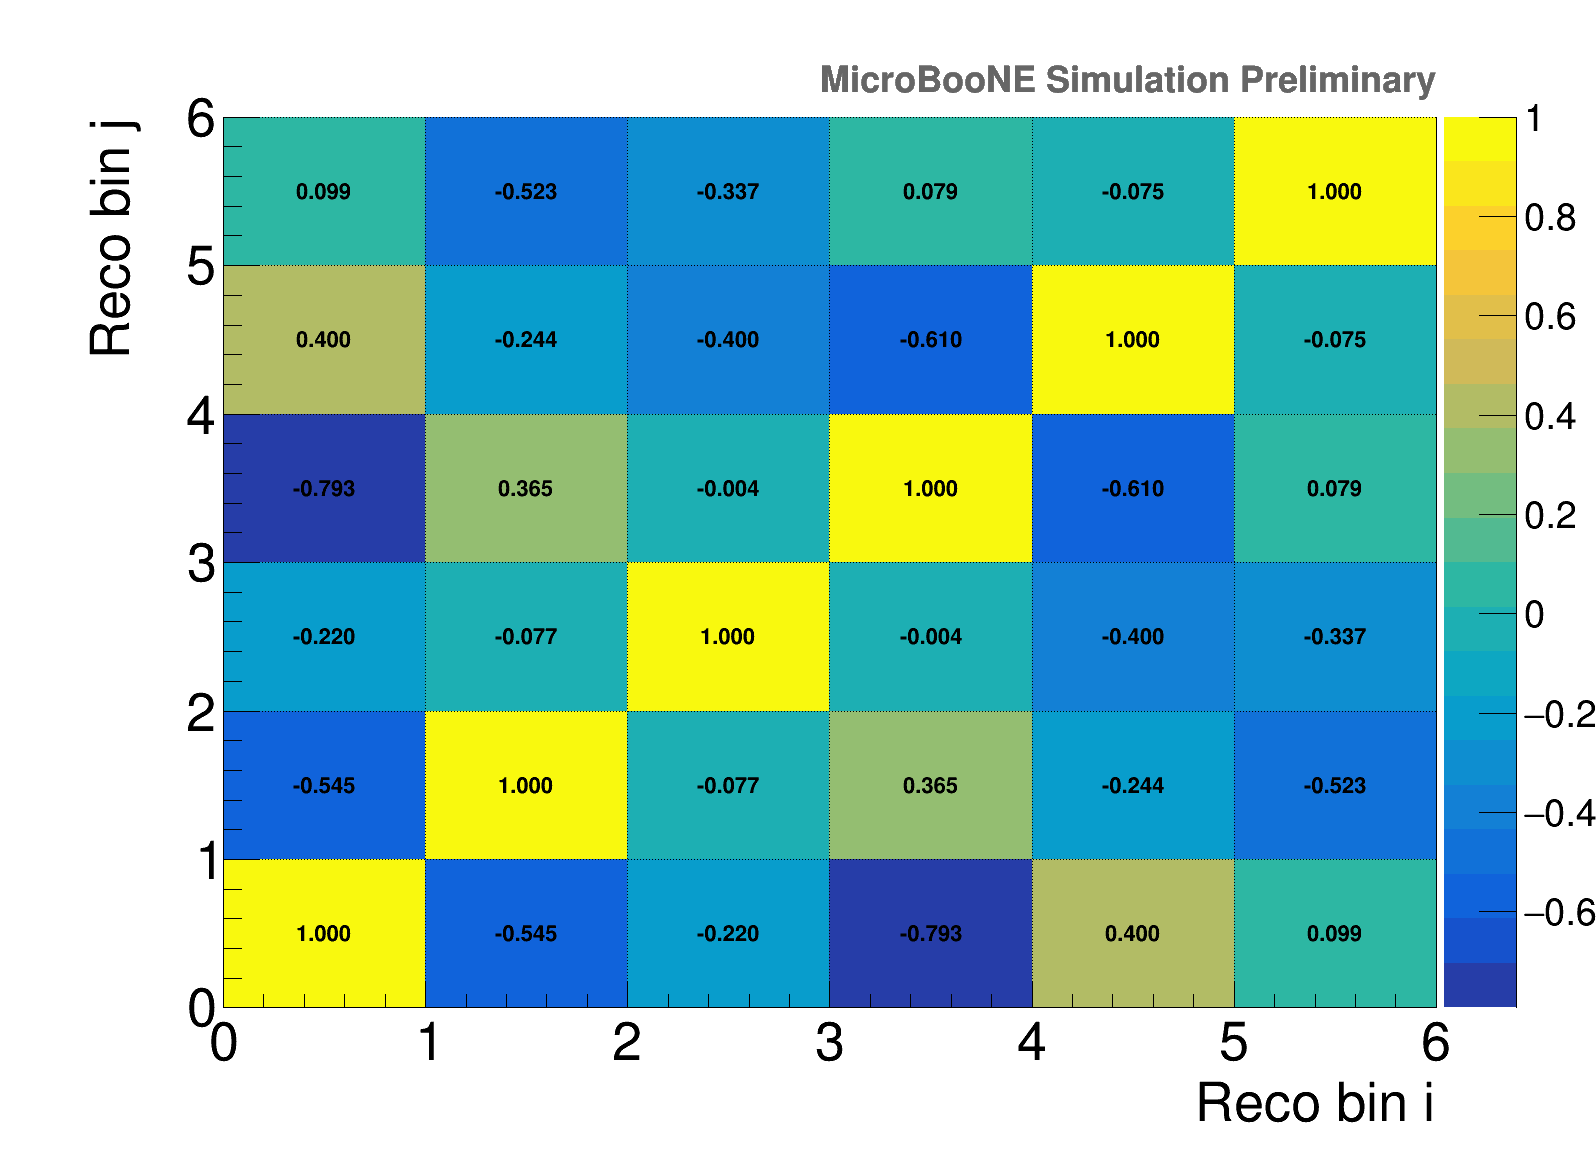

In [15]:
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation = ROOT.TH2D("h_correlation",'Correlation matrix',6,0,6,6,0,6)
for i in range(num_bins):
    for j in range(num_bins):
        h_correlation.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_correlation.SetXTitle("Reco bin i")
h_correlation.SetYTitle("Reco bin j")

h_correlation.GetYaxis().SetTitleSize(0.05)
h_correlation.GetYaxis().SetTitleOffset(0.0)
h_correlation.GetYaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleSize(0.05)
h_correlation.GetXaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleOffset(1)
h_correlation.SetLineColor(ROOT.kBlack)
h_correlation.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')

#h_correlation.SetMinimum(-1)
h_correlation.Draw('colz')
h_correlation.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_detsys.png")
c1.SaveAs(outputdir_root + "h_correlation_detsys.root")
c1.SaveAs(outputdir_pdf + "h_correlation_detsys.pdf")
h_correlation.Write('h_correlation')

676

Warning in <TFile::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_covariance_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_covariance_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_covariance_detsys.pdf has been created


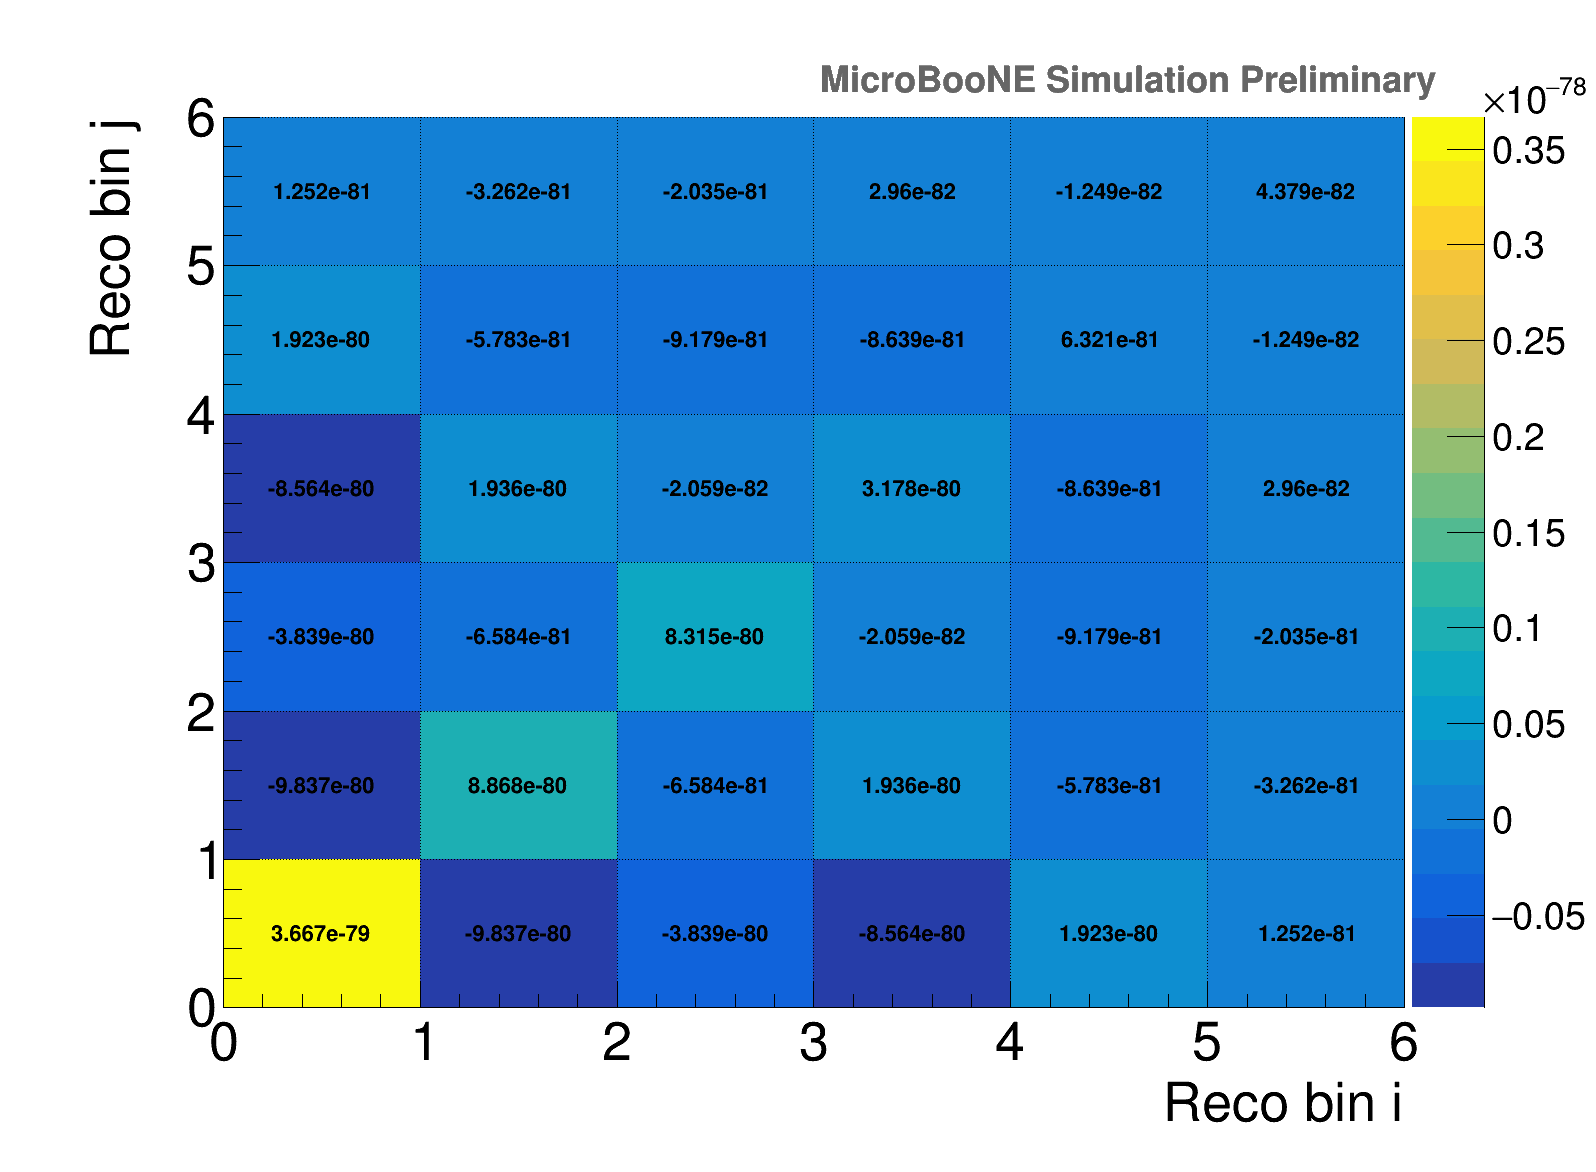

In [16]:
ROOT.gStyle.SetPaintTextFormat('0.6g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix',6,0,6,6,0,6)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")

h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4g')

h_covariance.Draw('colz')
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_detsys.png")
c1.SaveAs(outputdir_root + "h_covariance_detsys.root")
c1.SaveAs(outputdir_pdf + "h_covariance_detsys.pdf")
h_covariance.Write('h_covariance')

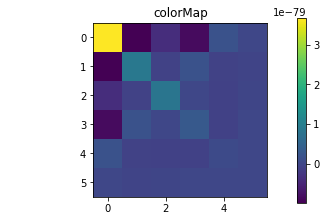

In [17]:
fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(xsec_cov_matrix)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show() 

In [18]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_eff_tilde_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_eff_tilde_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_eff_tilde_detsys.pdf has been created


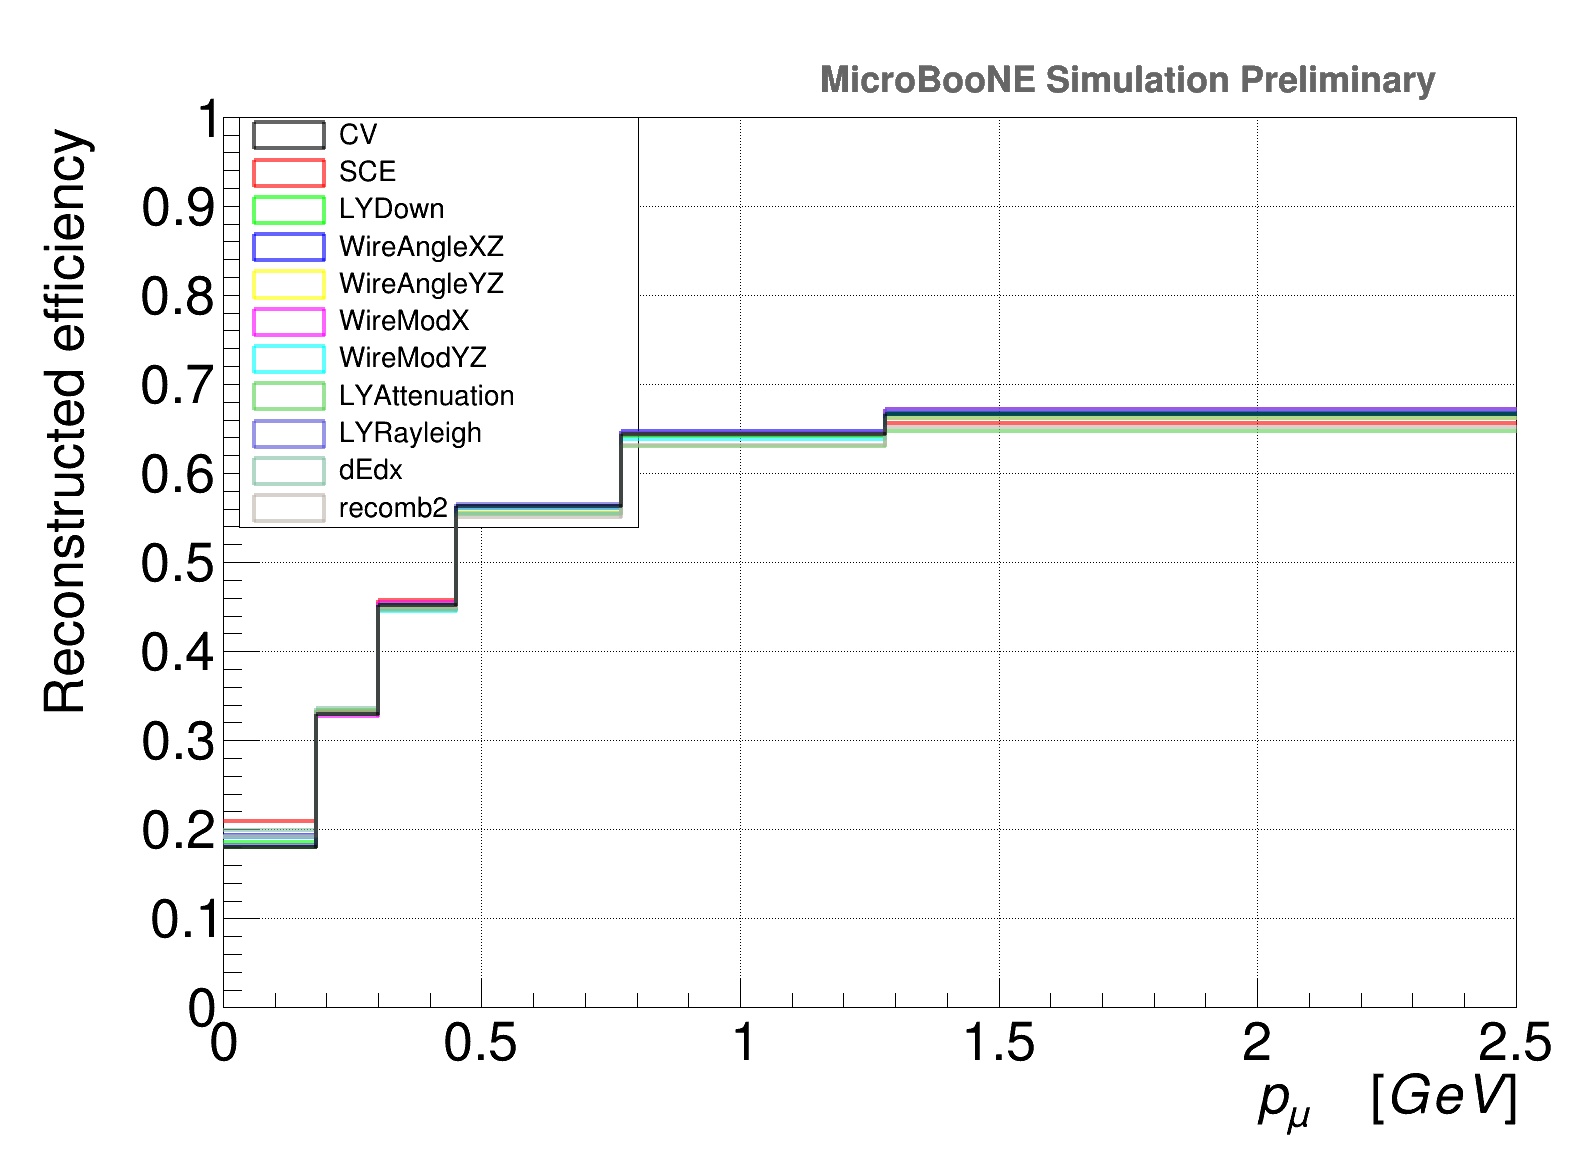

In [19]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
del h_files[:]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.4,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_eff_tilde'))
    h_files[i].SetLineColorAlpha(i+1,0.6)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.6)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetYTitle("Reconstructed efficiency")
        h_files[i].SetXTitle("p_{\mu} \quad [GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].SetYTitle("Reconstructed efficiency")
        h_files[i].SetXTitle("p_{\mu} \quad [GeV]")
        h_files[i].SetYTitle("Reconstructed efficiency")
        h_files[i].SetXTitle("p_{\mu} \quad [GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw("hist same")
    i+=1
h_files[0].Draw("hist same")
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_detsys.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_detsys.root")
c1.SaveAs(outputdir_pdf + "h_eff_tilde_detsys.pdf")

In [20]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_eff_true_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_eff_true_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_eff_true_detsys.pdf has been created


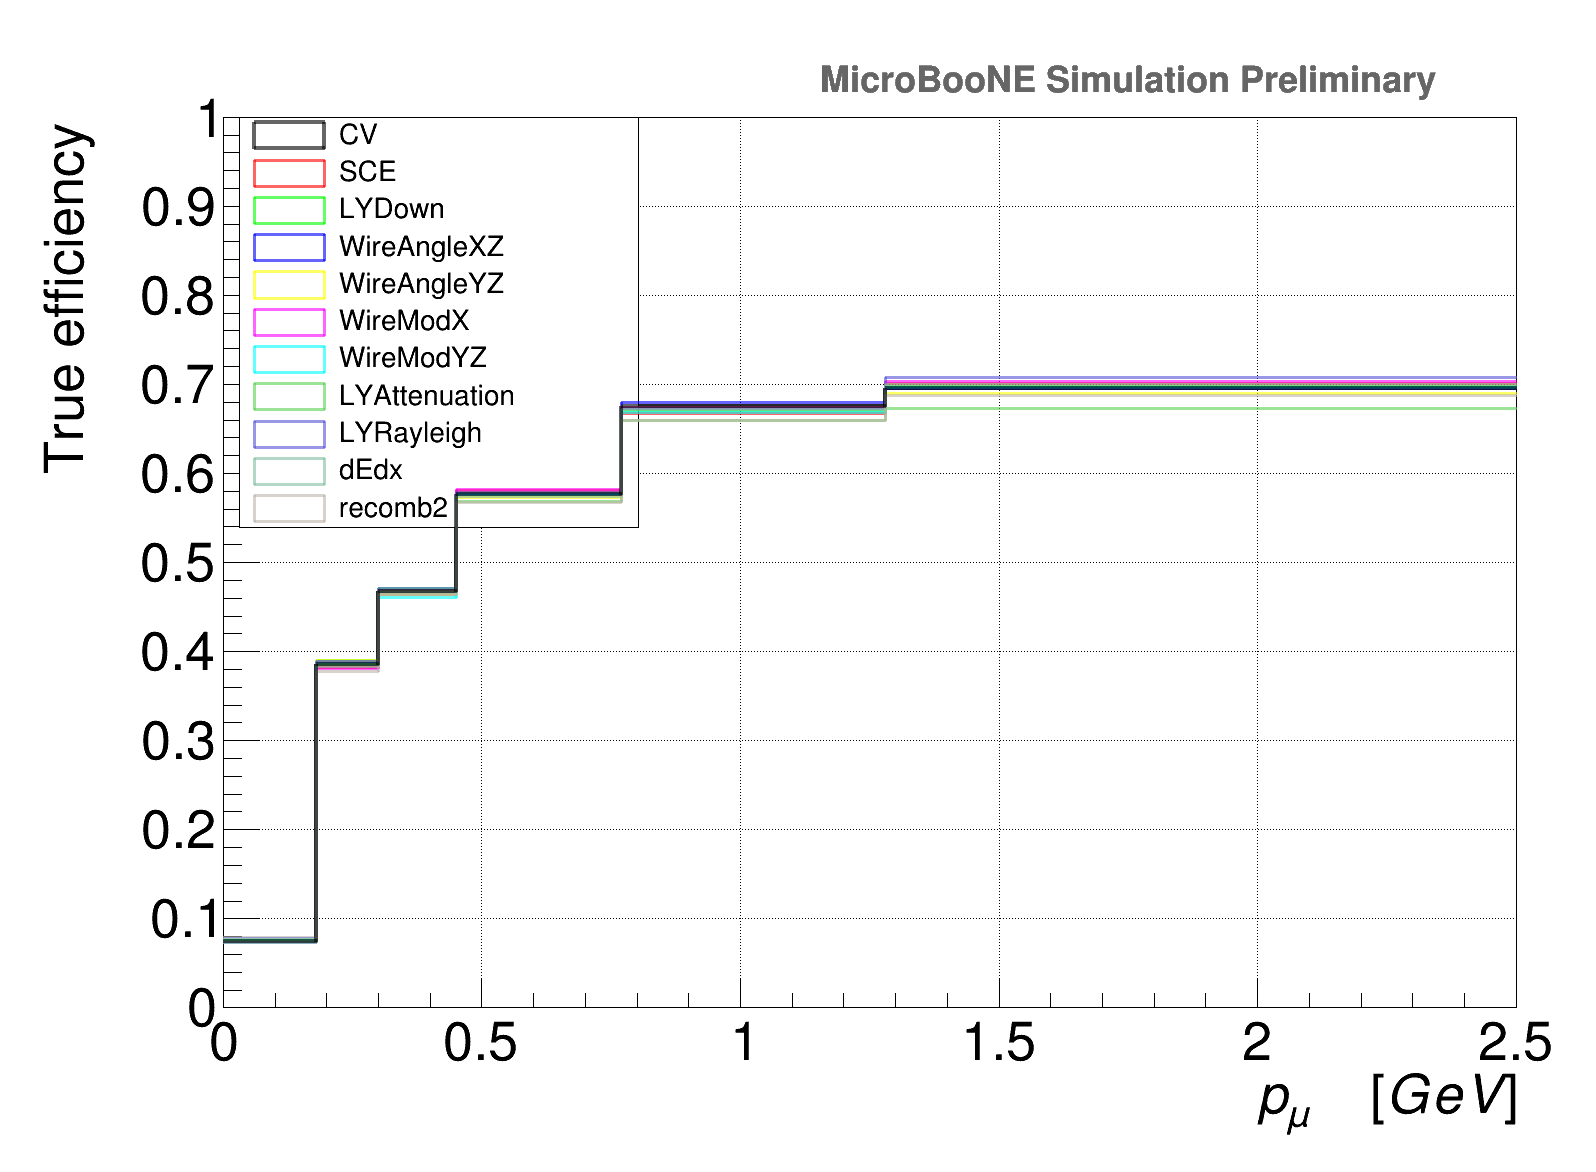

In [21]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
#del h_files_z[:]
#del h_files_n[:]
del h_files[:]
h_files_z = []
h_files_n = []
h_files = []

i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.4,0.9) # LEGEND LEFT
for x in files:
    h_files_z.append(x.Get('h_eff_true_energy_z'))
    h_files_n.append(x.Get('h_eff_true_energy_n'))
    h_files.append(h_files_z[i])
    h_files[i].Divide(h_files_n[i])
    h_files[i].SetLineColorAlpha(i+1,0.6)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.6)
    h_files[i].SetLineWidth(3)
    h_files[i].SetMaximum(1)
    h_files[i].SetMinimum(0)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetYTitle("True efficiency")
        h_files[i].SetXTitle("p_{\mu} \quad [GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
        h_files[i].SetYTitle("Reconstructed efficiency")
        h_files[i].SetXTitle("p_{\mu} \quad [GeV]")
    i+=1
h_files[0].Draw("hist same")
#legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_true_detsys.png")
c1.SaveAs(outputdir_root + "h_eff_true_detsys.root")
c1.SaveAs(outputdir_pdf + "h_eff_true_detsys.pdf")

In [22]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_overlay_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_overlay_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_overlay_detsys.pdf has been created


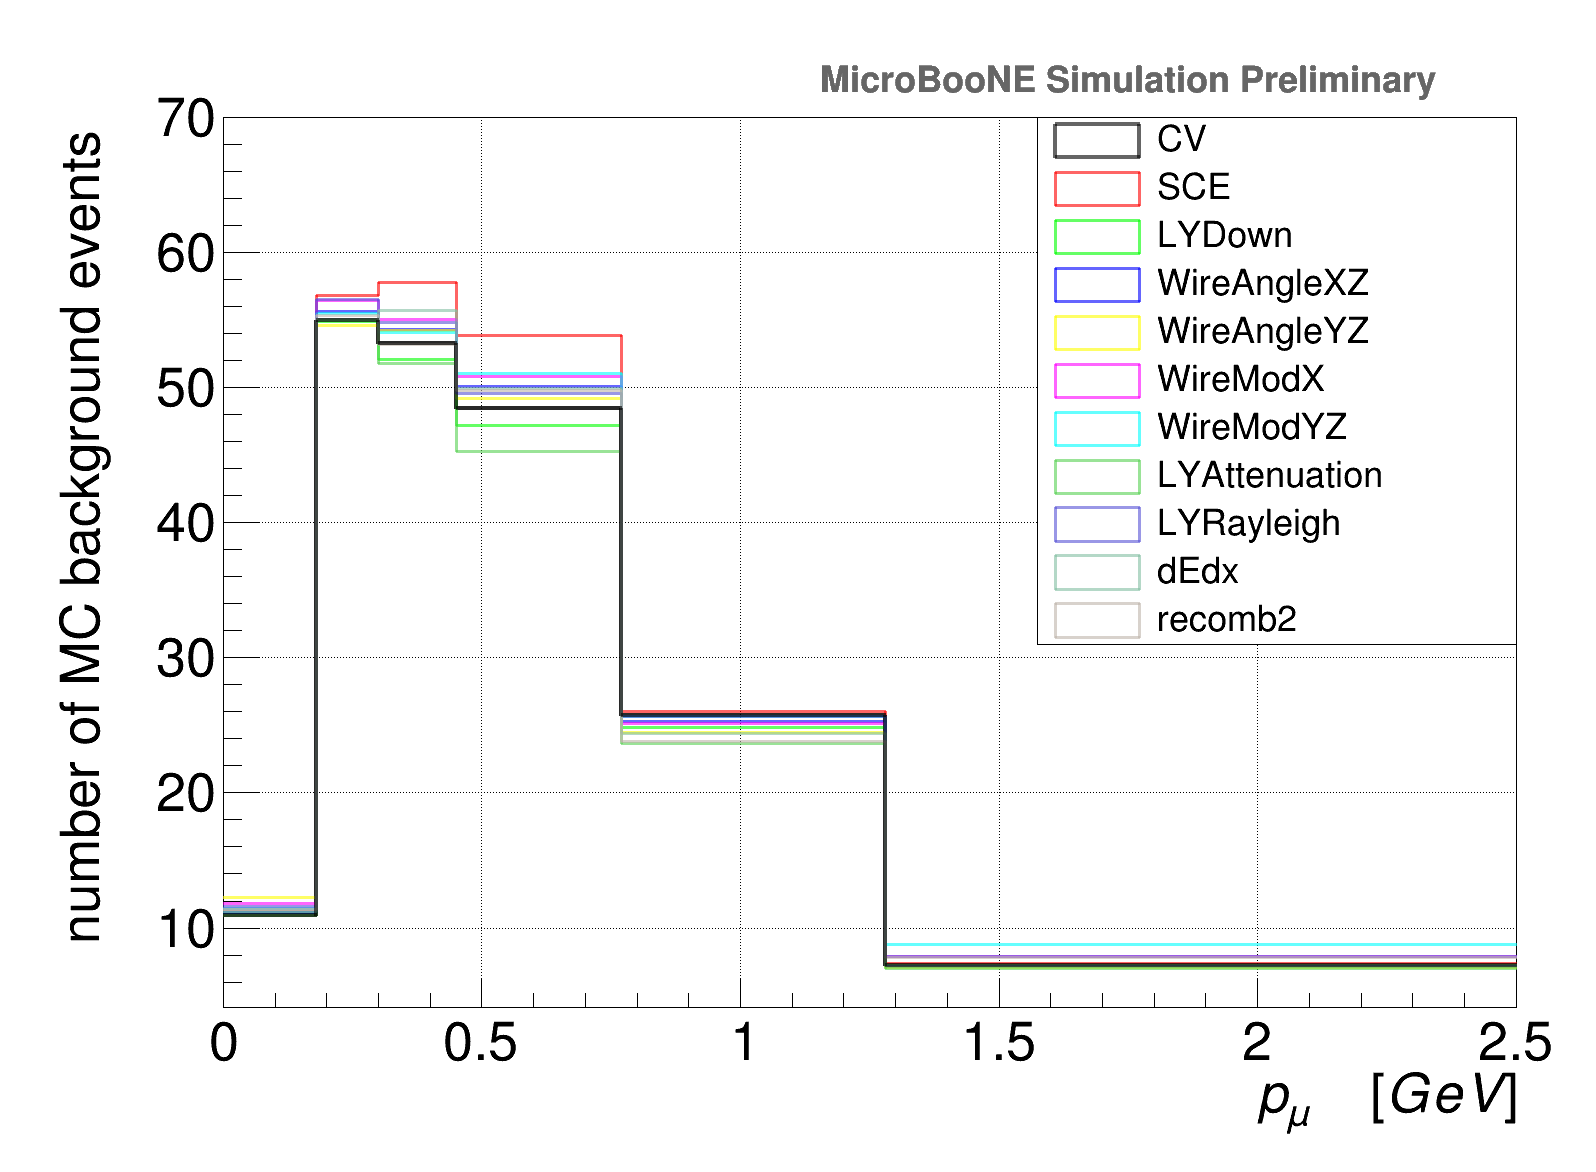

In [23]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
del h_files[:]
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_overlay'))
    h_files[i].SetLineColorAlpha(i+1,0.6)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.6)
    h_files[i].SetLineWidth(3)
    #h_files[i].SetMaximum(1)
    #h_files[i].SetMinimum(0)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetMaximum(70)
        h_files[i].SetYTitle("number of MC background events")
        h_files[i].SetXTitle("p_{\mu} \quad [GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].SetMaximum(70)
        h_files[i].Draw("hist same")
        h_files[i].SetYTitle("number of MC background events")
        h_files[i].SetXTitle("p_{\mu} \quad [GeV]")
    i+=1
h_files[0].Draw("hist same")
#legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_overlay_detsys.png")
c1.SaveAs(outputdir_root + "h_overlay_detsys.root")
c1.SaveAs(outputdir_pdf + "h_overlay_detsys.pdf")

In [24]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_xsec_detsys_all_det.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_xsec_detsys_all_det.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_xsec_detsys_all_det.pdf has been created


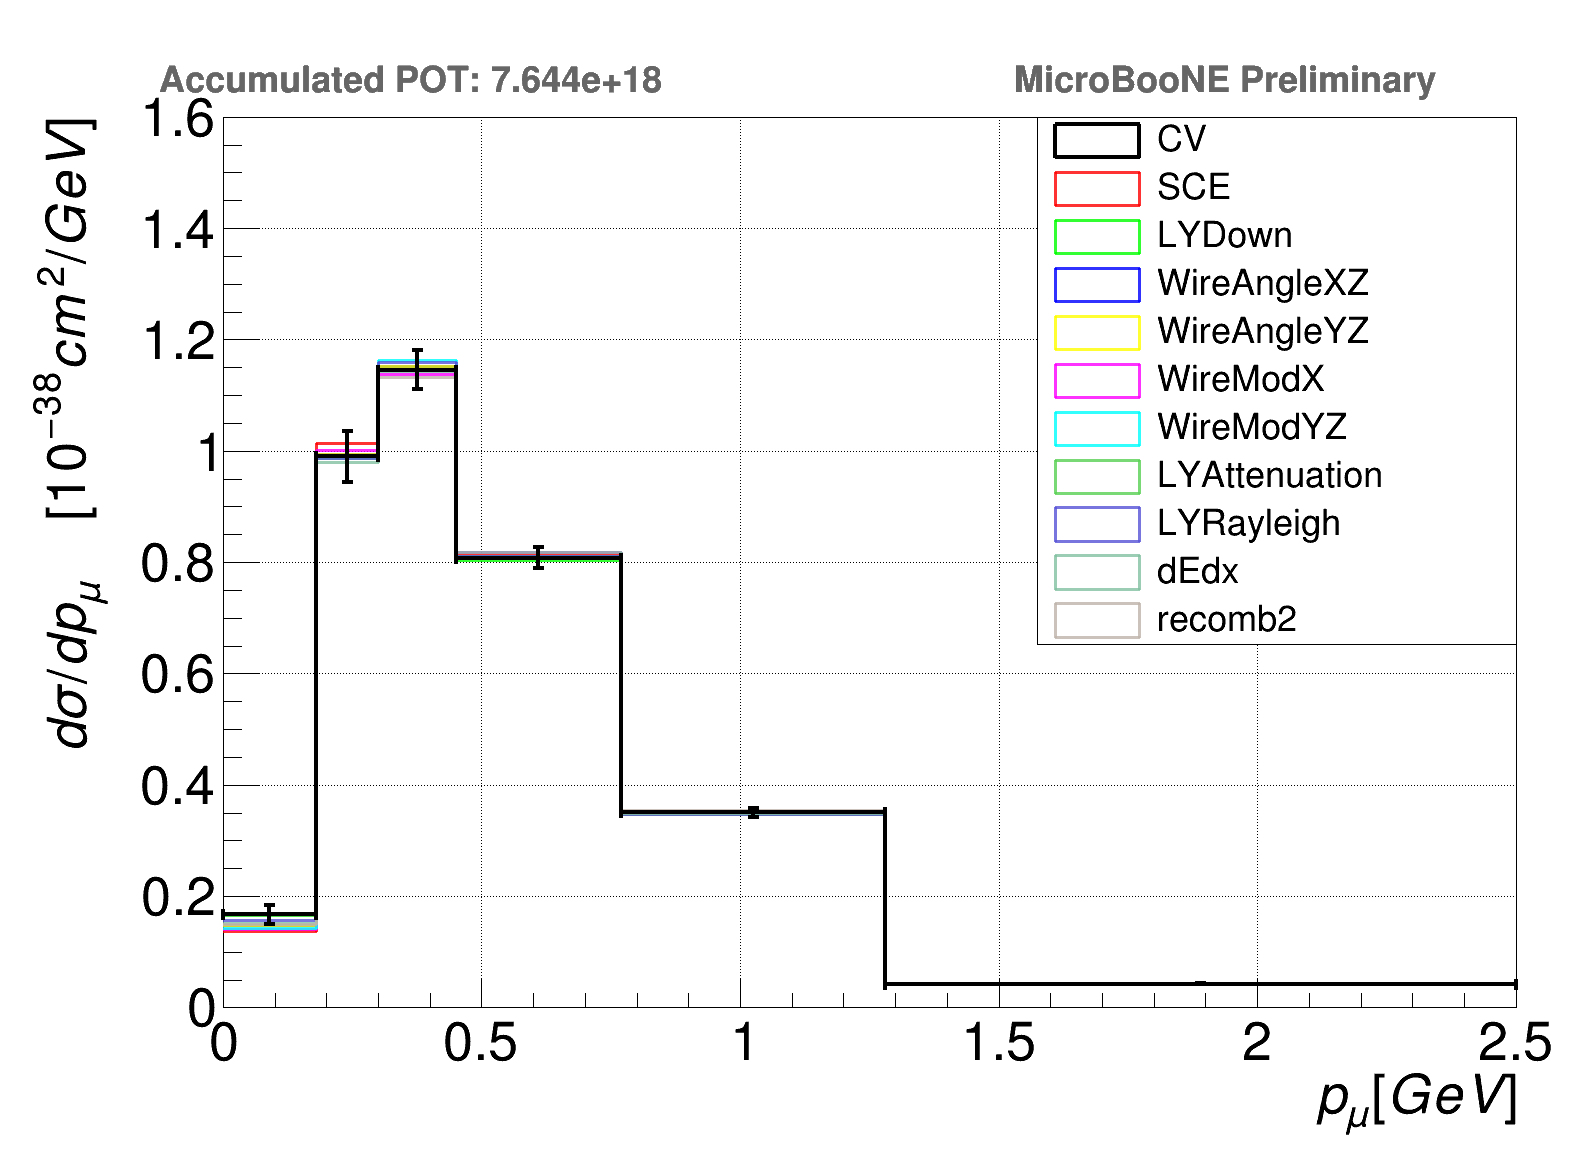

In [25]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_MC'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(1.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d p_{\mu} \quad [10^{-38} cm^2/GeV]")
    h_files[i].SetXTitle("p_{\mu} [GeV]")
    if i == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
#for i in range(1,h_files[0].GetNbinsX()+1):
#    h_files[0].SetBinError(i,h_files[0].GetBinError(i)+math.sqrt(h_covariance.GetBinContent(i,i)))
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("hist E1 same")
h_stat = h_files[0].Clone()
legend.Draw()

c1.Draw()
del h_files[:]
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.SaveAs(outputdir_png + "h_xsec_detsys_all_det.png")
c1.SaveAs(outputdir_root + "h_xsec_detsys_all_det.root")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_all_det.pdf")

#h_files.clear()

In [26]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_xsec_detsys_wError.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_xsec_detsys_wError.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_xsec_detsys_wError.pdf has been created


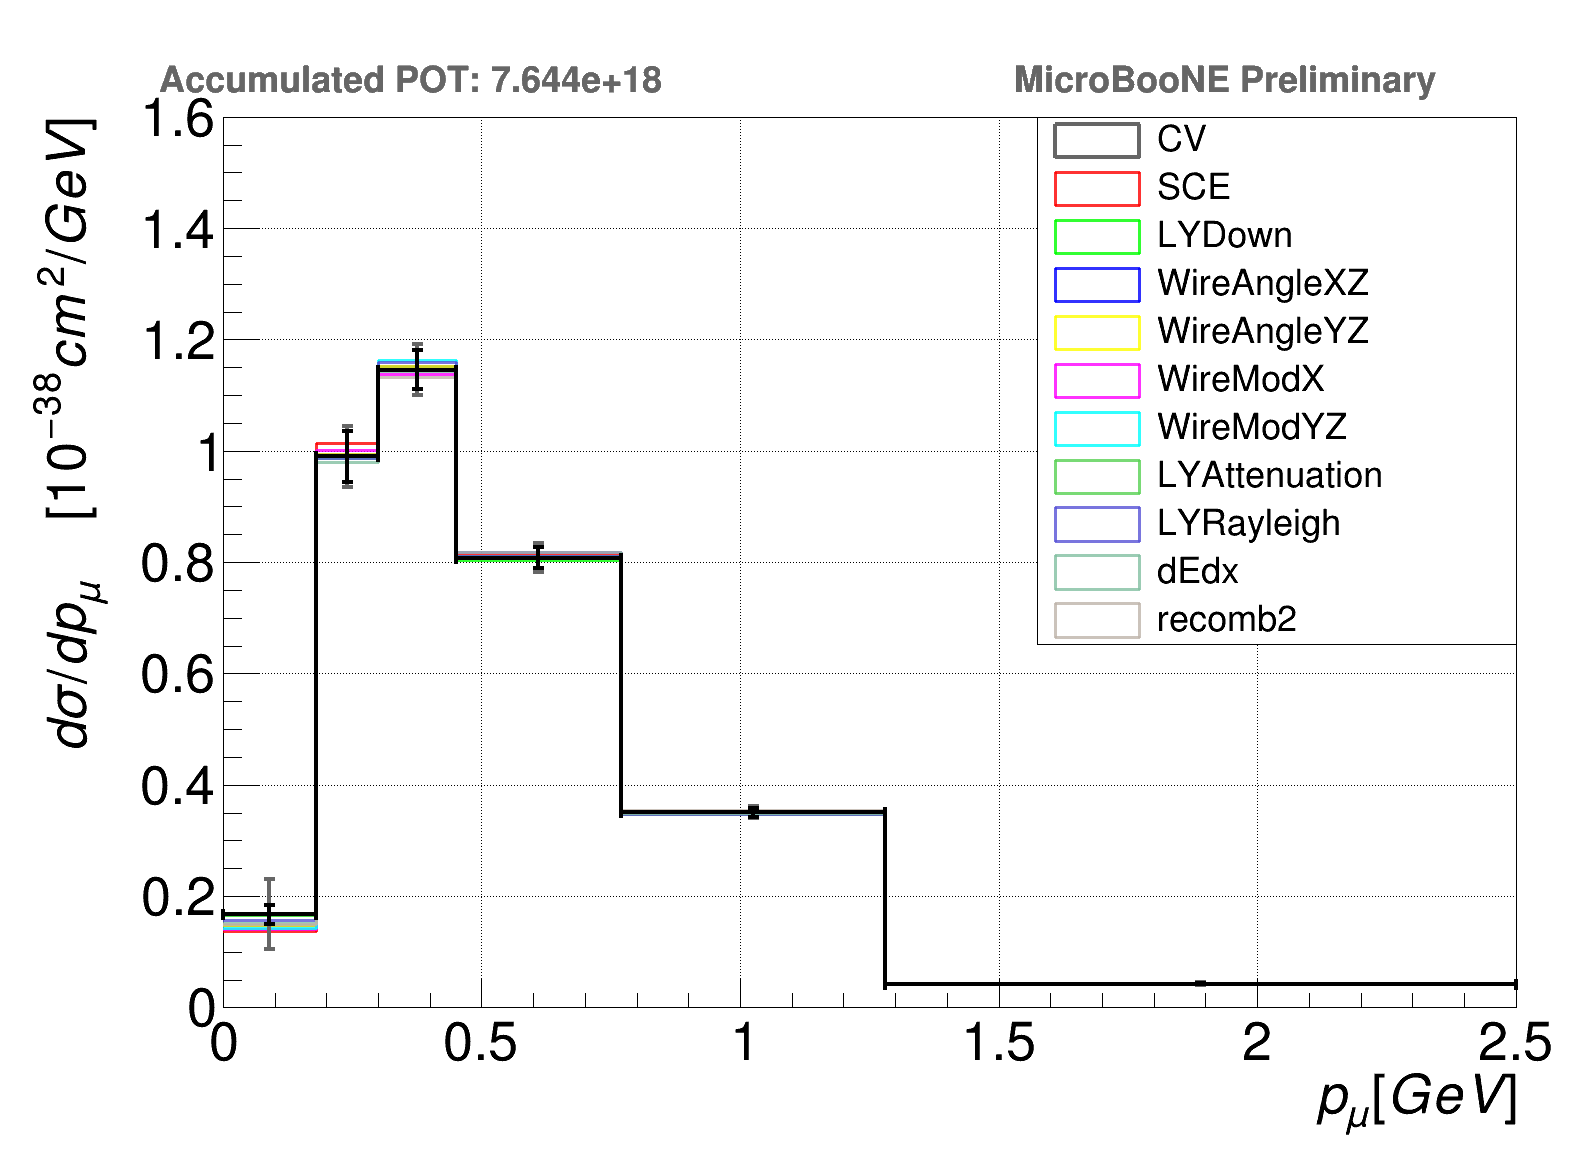

In [27]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_MC'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(1.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d p_{\mu} \quad [10^{-38} cm^2/GeV]")
    h_files[i].SetXTitle("p_{\mu} [GeV]")
    if i == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('E1')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
for i in range(1,h_files[0].GetNbinsX()+1):
    h_files[0].SetBinError(i,math.sqrt(math.pow(h_files[0].GetBinError(i),2)+h_covariance.GetBinContent(i,i)*1e76))
    #h_files[0].SetBinError(i,h_files[0].GetBinError(i)+math.sqrt(h_covariance.GetBinContent(i,i))*1e38)
h_files[0].SetLineColor(ROOT.kGray+2)
h_files[0].Draw("E1 same")
h_stat.SetLineColor(ROOT.kBlack)
h_stat.SetMarkerSize(0.9)
h_stat.Draw('hist E1 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_wError.png")
c1.SaveAs(outputdir_root + "h_xsec_detsys_wError.root")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_wError.pdf")

#h_files.clear()

In [28]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


0.060555267457
0.0297794327576
0.0288363717219
0.0178263704006
0.00795053563462
0.00209265519366


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_xsec_detsys_errdetsys_only.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_xsec_detsys_errdetsys_only.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_xsec_detsys_errdetsys_only.pdf has been created


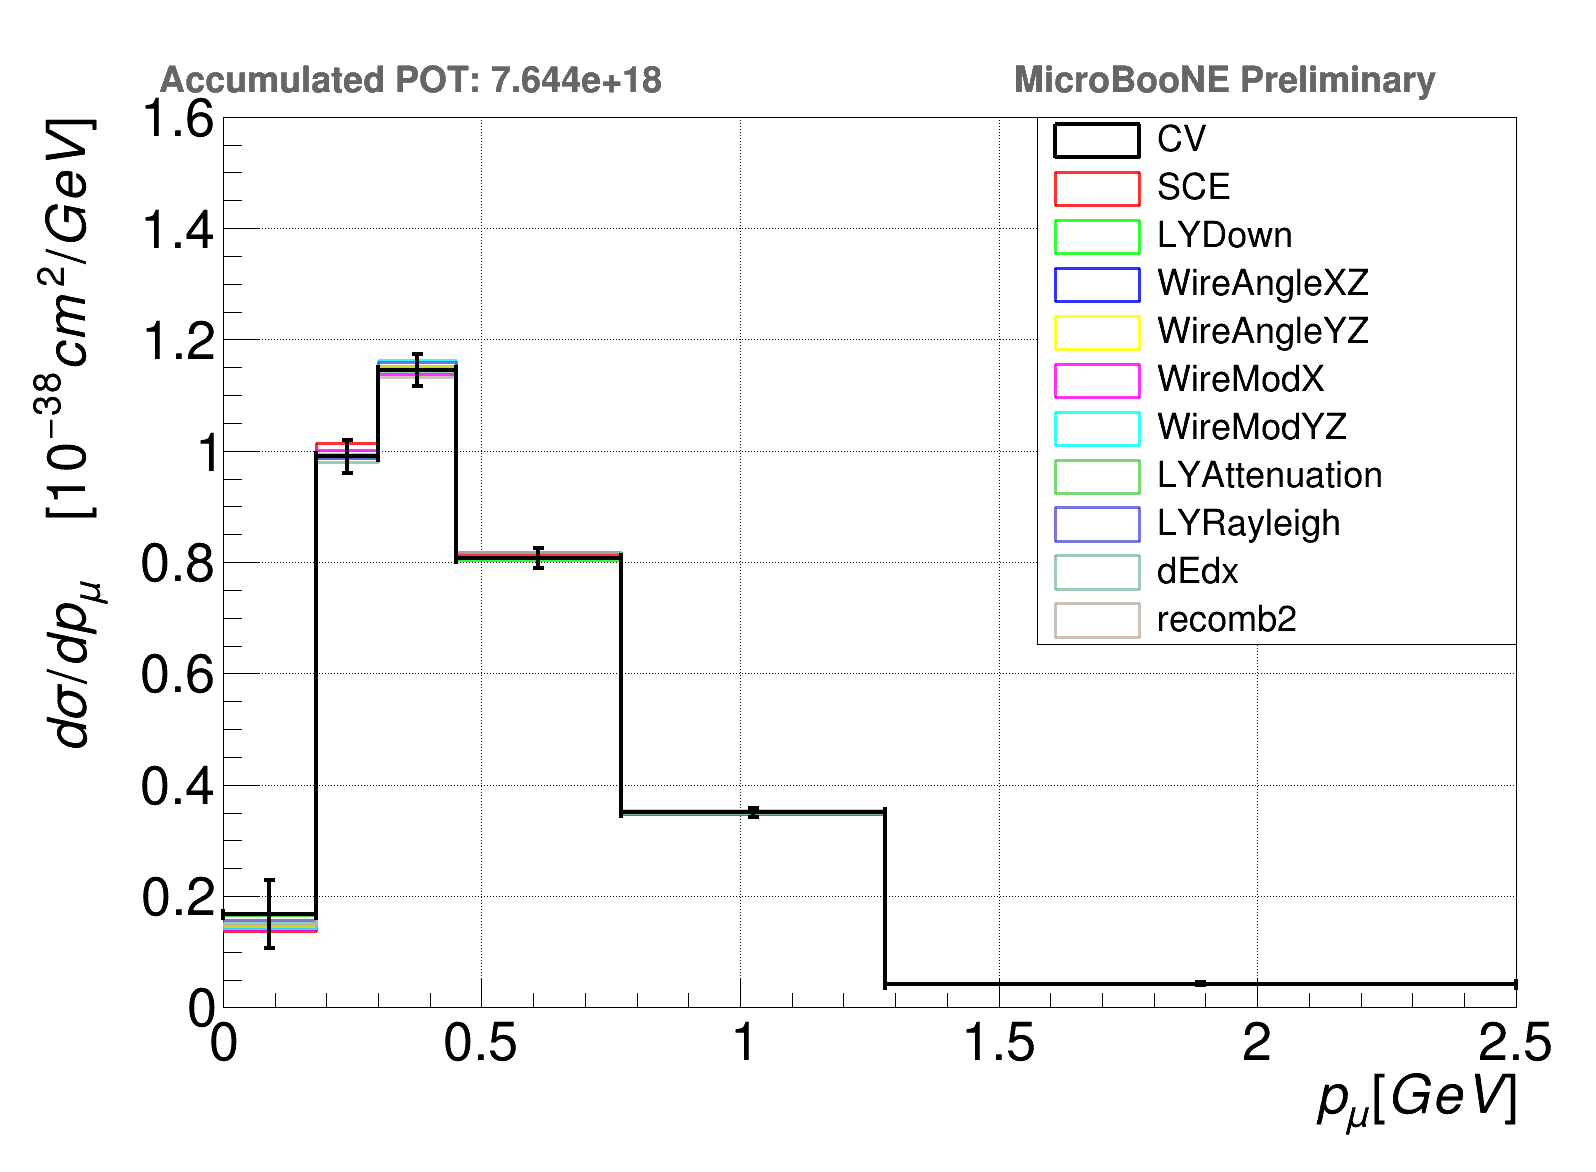

In [29]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_MC'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(1.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d p_{\mu} \quad [10^{-38} cm^2/GeV]")
    h_files[i].SetXTitle("p_{\mu} [GeV]")
    if i == 0:
        for j in range(1,h_files[0].GetNbinsX()+1):
            h_files[0].SetBinError(j,math.sqrt(h_covariance.GetBinContent(j,j)*1e76))
            print h_files[0].GetBinError(j)
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('E1')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("E1 hist same")
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_errdetsys_only.png")
c1.SaveAs(outputdir_root + "h_xsec_detsys_errdetsys_only.root")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_errdetsys_only.pdf")

#h_files.clear()

In [30]:
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1

In [31]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
del h_files[:]
h_files_data = []
h_files_ext = []
h_files_dirt = []
h_files_overlay = []
h_files_eff = []
h_files_eff_true = []
'''Number of data: 1348
Number of ext: 142.179032863
Number of dirt: 32.1298248268
Number of overlay: 201.313414536
Number of overlay signal: 970.556760372'''

n_data = 1348.0
n_data = 970.556760372+142.179032863+32.1298248268+201.313414536
n_ext = 142.179032863
n_dirt = 32.1298248268
N_tot = 4.10331e+31
beam_flux = 5.64049e+09

i = 0
xsec_CV = 0.0
tot_diff = 0.0
print f_cv
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT
for x in files:
    print '###', name_files[i],'###################################################################'
    h_files_overlay.append(x.Get('h_overlay'))
    h_files_eff.append(x.Get('h_eff_true_energy_z'))
    h_files_eff_true.append(x.Get('h_eff_true_energy_n'))

    print h_files_eff[i].Integral(0,binnum+1)
    print h_files_eff_true[i].Integral(0,binnum+1)
    
    eff = h_files_eff[i].Integral(0,binnum+1)/h_files_eff_true[i].Integral(0,binnum+1)
    xsec = (n_data - n_ext - n_dirt - h_files_overlay[i].Integral(0,binnum+1))/(N_tot*beam_flux*eff)
    if i==0:
        xsec_CV = xsec
    
    #print n_data, n_ext, n_dirt, h_files_overlay[i].Integral(0,binnum+1)
    print xsec, eff, h_files_overlay[i].Integral(0,binnum+1)
    #print 'Total xsec of: ',name_files[i],' = {0:0.5f}'.format(xsec*1e38),' difference= {0:0.2f}'.format((xsec - xsec_CV)/xsec_CV*100),'%'
    print 'Total xsec of: ',name_files[i],' = {0:0.5f}e-38'.format(xsec*1e38),' & {0:0.2f}'.format((xsec - xsec_CV)/xsec_CV*100),'\%'
    i +=1
    tot_diff = tot_diff+(xsec - xsec_CV)*(xsec - xsec_CV)
tot_diff = math.sqrt(tot_diff)
print 'Total differencs: ',tot_diff, ' in percent: ',tot_diff/xsec_CV*100,'%'

<ROOT.TFile object ("/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/xsec_detsys_CV.root") at 0x5d80f50>
### CV ###################################################################
15192.3746643
29313.8745422
8.09128243819e-39 0.51826566435 201.3133661
Total xsec of:  CV  = 0.80913e-38  & 0.00 \%
### SCE ###################################################################
16668.1943817
32055.9475708
7.95971914788e-39 0.5199719754 213.951050401
Total xsec of:  SCE  = 0.79597e-38  & -1.63 \%
### LYDown ###################################################################
15516.4120789
29919.9592285
8.11195186874e-39 0.518597367074 198.211281836
Total xsec of:  LYDown  = 0.81120e-38  & 0.26 \%
### WireAngleXZ ###################################################################
15732.0692596
30291.1024475
8.04669328913e-39 0.519362716722 204.618745893
Total xsec of:  WireAngleXZ  = 0.80467e-38  & -0.55 \%
### WireAngleYZ #################################################

In [32]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
del h_files[:]
h_files_data = []
h_files_ext = []
h_files_dirt = []
h_files_overlay = []
h_files_eff = []
h_files_eff_true = []
'''Number of data: 1348
Number of ext: 142.179032863
Number of dirt: 32.1298248268
Number of overlay: 201.313414536
Number of overlay signal: 970.556760372'''

n_data = 1348.0
n_data = 970.556760372+142.179032863+32.1298248268+201.313414536
n_ext = 142.179032863
n_dirt = 32.1298248268
N_tot = 4.10331e+31
beam_flux = 5.64049e+09

i = 0
xsec_CV = 0.0
tot_diff = 0.0
print f_cv
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT
for x in files:
    print '###', name_files[i],'###################################################################'
    h_files_overlay.append(x.Get('h_overlay'))
    h_files_eff.append(x.Get('h_eff_true_energy_z'))
    h_files_eff_true.append(x.Get('h_eff_true_energy_n'))

    #print h_files_eff[i].Integral(0,binnum+1)
    #print h_files_eff_true[i].Integral(0,binnum+1)
    scale = 0.0638845208392/h_files_eff_true[i].Integral(0,binnum+1)*29313.8745422
    print scale
    eff = h_files_eff[i].Integral(0,binnum+1)/h_files_eff_true[i].Integral(0,binnum+1)
    xsec = (h_files_eff[i].Integral(0,binnum+1)*scale)/(N_tot*beam_flux*eff)
    if i==0:
        xsec_CV = xsec
    
    #print n_data, n_ext, n_dirt, h_files_overlay[i].Integral(0,binnum+1)
    print xsec, eff, h_files_overlay[i].Integral(0,binnum+1), h_files_eff[i].Integral(0,binnum+1)*scale
    #print 'Total xsec of: ',name_files[i],' = {0:0.5f}'.format(xsec*1e38),' difference= {0:0.2f}'.format((xsec - xsec_CV)/xsec_CV*100),'%'
    print 'Total xsec of: ',name_files[i],' = {0:0.5f}e-38'.format(xsec*1e38),' & {0:0.2f}'.format((xsec - xsec_CV)/xsec_CV*100),'\%'
    i +=1
    tot_diff = tot_diff+(xsec - xsec_CV)*(xsec - xsec_CV)
tot_diff = math.sqrt(tot_diff)
print 'Total differencs: ',tot_diff, ' in percent: ',tot_diff/xsec_CV*100,'%'

<ROOT.TFile object ("/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/xsec_detsys_CV.root") at 0x5d80f50>
### CV ###################################################################
0.0638845208391
8.09128883272e-39 0.51826566435 201.3133661 970.557575838
Total xsec of:  CV  = 0.80913e-38  & 0.00 \%
### SCE ###################################################################
0.0584198244314
8.09128883272e-39 0.5199719754 213.951050401 973.752989368
Total xsec of:  SCE  = 0.80913e-38  & 0.00 \%
### LYDown ###################################################################
0.0625904204871
8.09128883272e-39 0.518597367074 198.211281836 971.178756466
Total xsec of:  LYDown  = 0.80913e-38  & 0.00 \%
### WireAngleXZ ###################################################################
0.061823528289
8.09128883272e-39 0.519362716722 204.618745893 972.612028918
Total xsec of:  WireAngleXZ  = 0.80913e-38  & 0.00 \%
### WireAngleYZ ############################################

In [33]:
x.Get('h_data')

<ROOT.TH1F object ("h_data") at 0x6647250>

In [34]:
RootFile.Close()

# now in cos theta

In [35]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_xsec_detsys_theta_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_xsec_detsys_theta_all.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_xsec_detsys_theta_all.pdf has been created


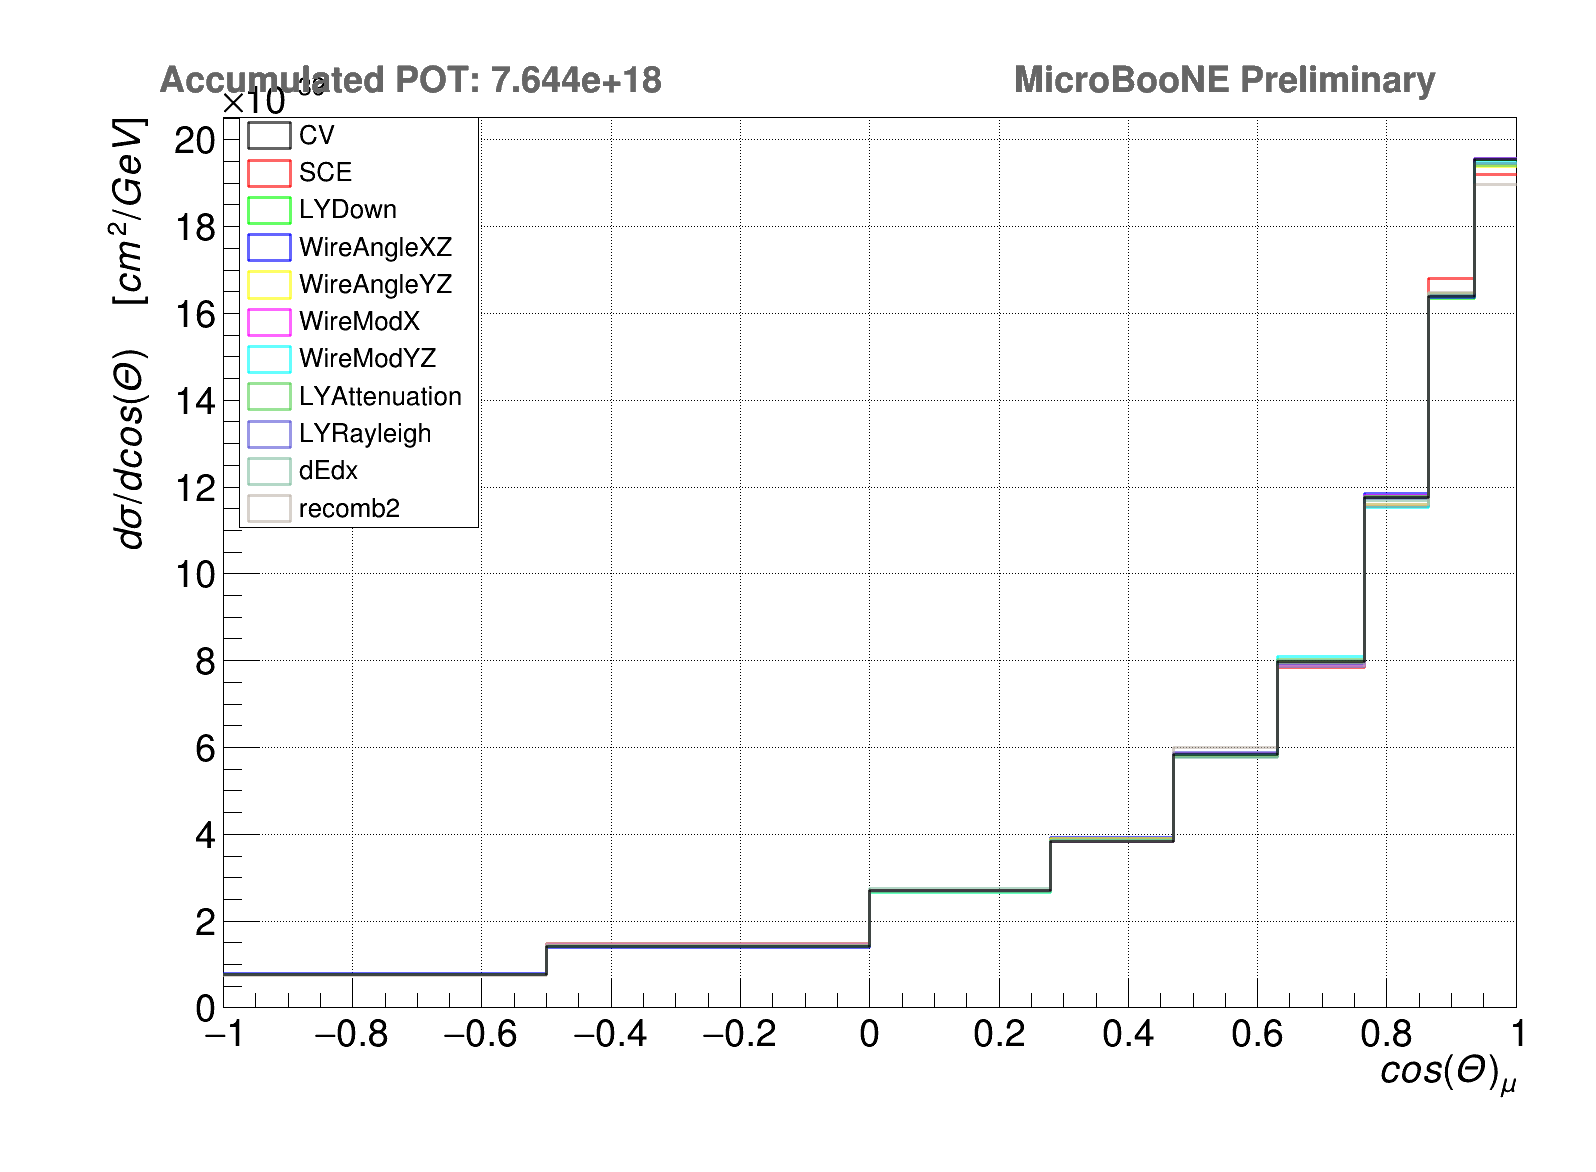

In [36]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_MC_theta'))
    h_files[i].SetLineColorAlpha(i+1,0.6)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.6)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
    h_files[i].SetXTitle("cos(\Theta)_{\mu}")
    if x == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
h_files[0].Draw("hist same")
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_theta_all.png")
c1.SaveAs(outputdir_root + "h_xsec_detsys_theta_all.root")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_theta_all.pdf")


#h_files.clear()

In [37]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ' ,'LYAttenuation', 'LYRayleigh' ]
num_file = 12
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT

for x in files:
    h_files.append(x.Get('h_xsec_MC_theta'))
num_bins = h_files[0].GetNbinsX()

xsec_diff_matrix = np.zeros((num_bins))

xsec_cov_matrix = np.zeros((num_bins,num_bins))

for f in range(1,num_file-1):
    xsec_diff_matrix = np.zeros((num_bins))
    for b in range(num_bins):
        xsec_diff_matrix[b]= (h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1) )/(h_files[0].GetBinContent(b+1) + 1e-100)
    #print np.matmul(xsec_diff_matrix,np.transpose(xsec_diff_matrix))
    xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix
np.save(output_filedir+'frac_covariance_theta_detsys',xsec_cov_matrix)

In [38]:
RootFile_theta = ROOT.TFile(output_filedir+"Detector_systematic_theta.root","RECREATE");

734

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_frac_covariance_theta_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_frac_covariance_theta_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_frac_covariance_theta_detsys.pdf has been created


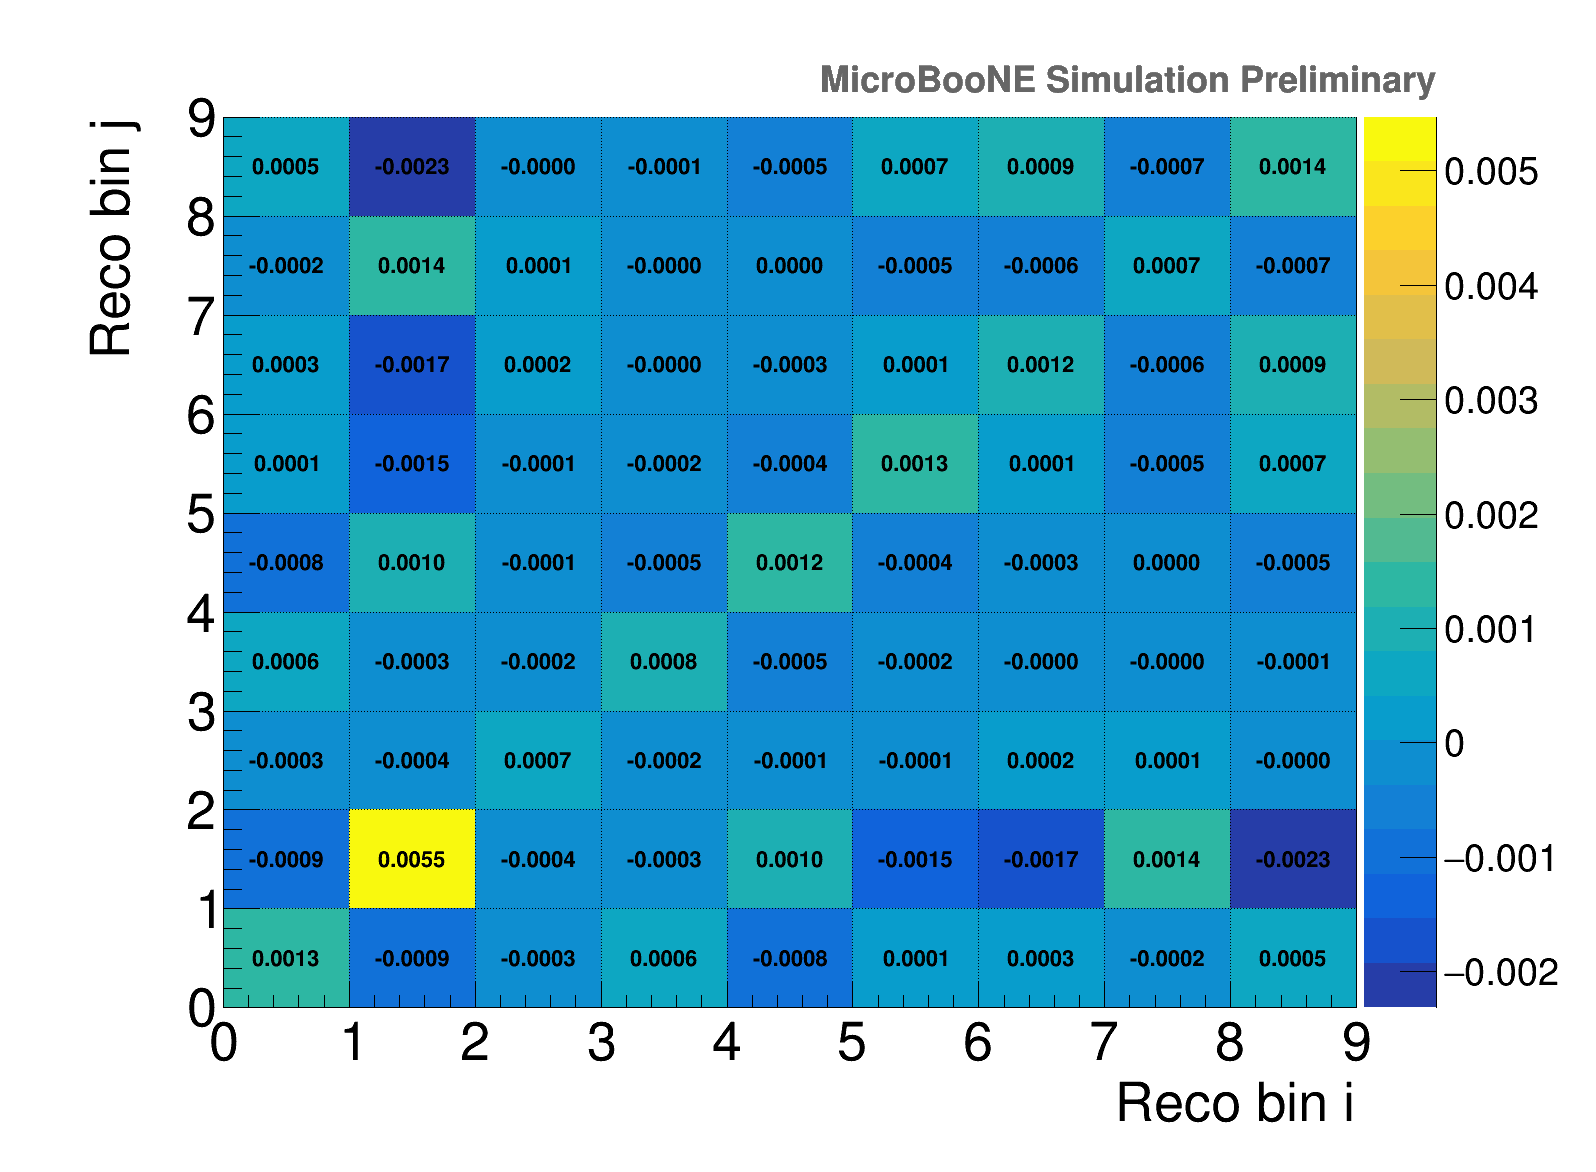

In [39]:
ROOT.gStyle.SetPaintTextFormat('0.6f')
h_covariance = ROOT.TH2F("h_covariance",'Covariance matrix',9,0,9,9,0,9)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.15)
ROOT.gStyle.SetPaintTextFormat('0.4f')
h_covariance.Draw('colz')
c1.SetLogz(0)
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_covariance_theta_detsys.png")
c1.SaveAs(outputdir_root + "h_frac_covariance_theta_detsys.root")
c1.SaveAs(outputdir_pdf + "h_frac_covariance_theta_detsys.pdf")
h_covariance.Write('h_frac_covariance')

In [40]:
quad_sum = 0.1
for i in range(num_bins):
    quad_sum = quad_sum+xsec_cov_matrix[i,i]
    print i, ' - ', xsec_cov_matrix[i,i], ' sqrt: ', math.sqrt(xsec_cov_matrix[i,i])
    
print 'Qad sum: ', quad_sum,' sqrt: ', math.sqrt(quad_sum)
print 'Qad sum: ', quad_sum/num_bins,' sqrt: ', math.sqrt(quad_sum/num_bins)
    

0  -  0.0012854583874697665  sqrt:  0.0358532897719
1  -  0.00546802840956284  sqrt:  0.073946118286
2  -  0.0007369016404276786  sqrt:  0.0271459322998
3  -  0.0007975517367283482  sqrt:  0.0282409584952
4  -  0.0012257039716045877  sqrt:  0.0350100552928
5  -  0.0012635013741713634  sqrt:  0.035545764504
6  -  0.001170638266662509  sqrt:  0.0342145914291
7  -  0.0007336931566721065  sqrt:  0.0270867708794
8  -  0.0013505332030643118  sqrt:  0.0367496014001
Qad sum:  0.11403201014636354  sqrt:  0.337686259931
Qad sum:  0.012670223349595949  sqrt:  0.112562086644


In [41]:
quad_sum = 0.0
for f in range(1,num_file-1):
    for b in range(1):
        err = h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1)
        print err, err/h_files[0].GetBinContent(b+1)
        quad_sum = quad_sum + err*err
print quad_sum , quad_sum/h_files[0].GetBinContent(1)/h_files[0].GetBinContent(1)
print math.sqrt(quad_sum), math.sqrt(quad_sum)/h_files[0].GetBinContent(1)
print h_files[0].GetBinContent(1)

2.84183328565e-42 0.00369283211817
-4.21230318376e-42 -0.00547369494439
-1.55403999694e-41 -0.0201940375693
-1.65072959097e-42 -0.00214504745326
-8.90665303925e-42 -0.0115737874473
-1.02350839834e-41 -0.0133000225794
6.13768727374e-43 0.000797564333214
-5.67806137744e-42 -0.0073783805438
-3.34630073281e-42 -0.00434836444684
1.62270362169e-41 0.0210862899055
7.6126539247e-82 0.00128545838747
2.75910382637e-41 0.0358532897719
7.6955388025e-40


In [42]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ' ,'LYAttenuation', 'LYRayleigh' ]
num_file = 12
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT

for x in files:
    h_files.append(x.Get('h_xsec_MC_theta'))
num_bins = h_files[0].GetNbinsX()
xsec_diff_matrix = np.zeros((num_bins))
xsec_cov_matrix = np.zeros((num_bins,num_bins))
for f in range(1,num_file-1):
    xsec_diff_matrix = np.zeros((num_bins))
    for b in range(num_bins):
        xsec_diff_matrix[b]= (h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1) )
    #print np.matmul(xsec_diff_matrix,np.transpose(xsec_diff_matrix))
    xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix
    
xsec_corr_matrix = np.zeros((num_bins,num_bins))
for i in range(num_bins):
    for j in range(num_bins):
        xsec_corr_matrix[i][j] = xsec_cov_matrix[i][j]/(math.sqrt(xsec_cov_matrix[i][i]*xsec_cov_matrix[j][j]))

np.save(output_filedir+'correlation_theta_detsys',xsec_corr_matrix)
np.save(output_filedir+'covariance_theta_detsys',xsec_cov_matrix)

926

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_correlation_theta_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_correlation_theta_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_correlation_theta_detsys.pdf has been created


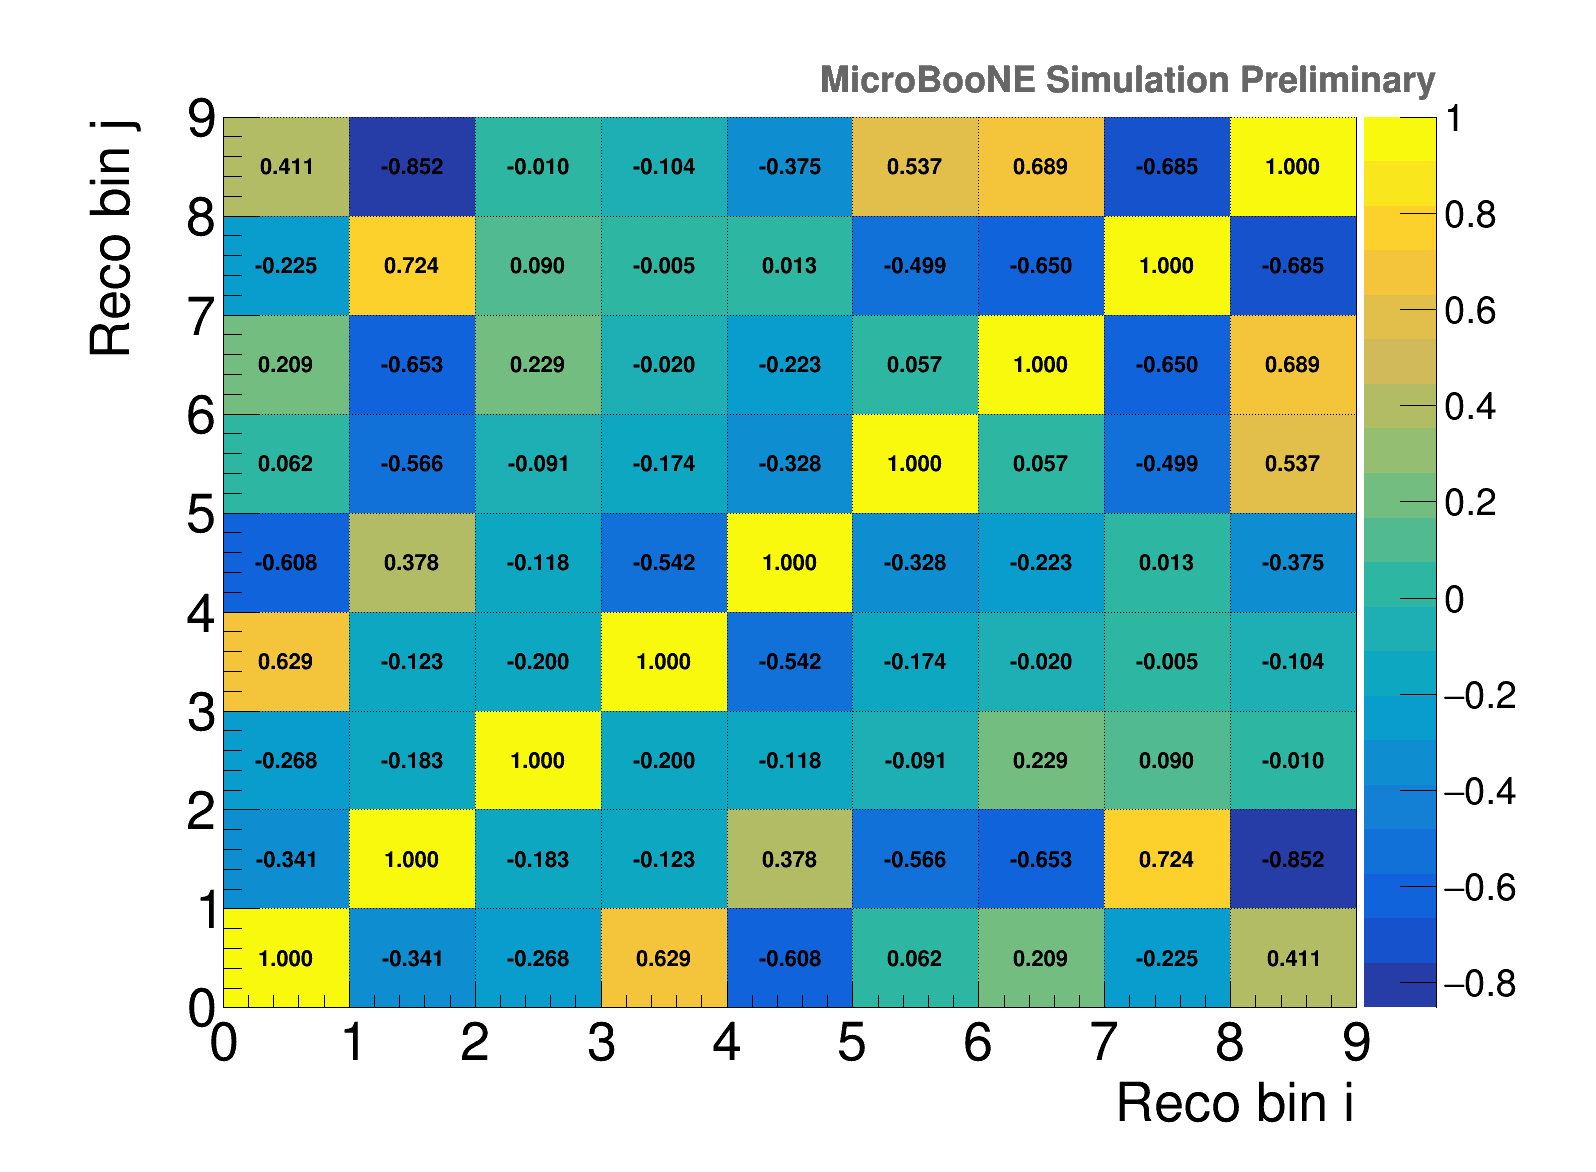

In [43]:
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation = ROOT.TH2D("h_correlation",'Correlation matrix',9,0,9,9,0,9)
for i in range(num_bins):
    for j in range(num_bins):
        h_correlation.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_correlation.SetXTitle("Reco bin i")
h_correlation.SetYTitle("Reco bin j")
h_correlation.GetYaxis().SetTitleSize(0.05)
h_correlation.GetYaxis().SetTitleOffset(0.0)
h_correlation.GetYaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleSize(0.05)
h_correlation.GetXaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleOffset(1)
h_correlation.SetLineColor(ROOT.kBlack)
h_correlation.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.15)
ROOT.gStyle.SetPaintTextFormat('0.3f')
#h_correlation.SetMinimum(-1)
h_correlation.Draw('colz')
h_correlation.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_theta_detsys.png")
c1.SaveAs(outputdir_root + "h_correlation_theta_detsys.root")
c1.SaveAs(outputdir_pdf + "h_correlation_theta_detsys.pdf")
h_correlation.Write('h_correlation')

890

Warning in <TFile::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_covariance_theta_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_covariance_theta_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_covariance_theta_detsys.pdf has been created


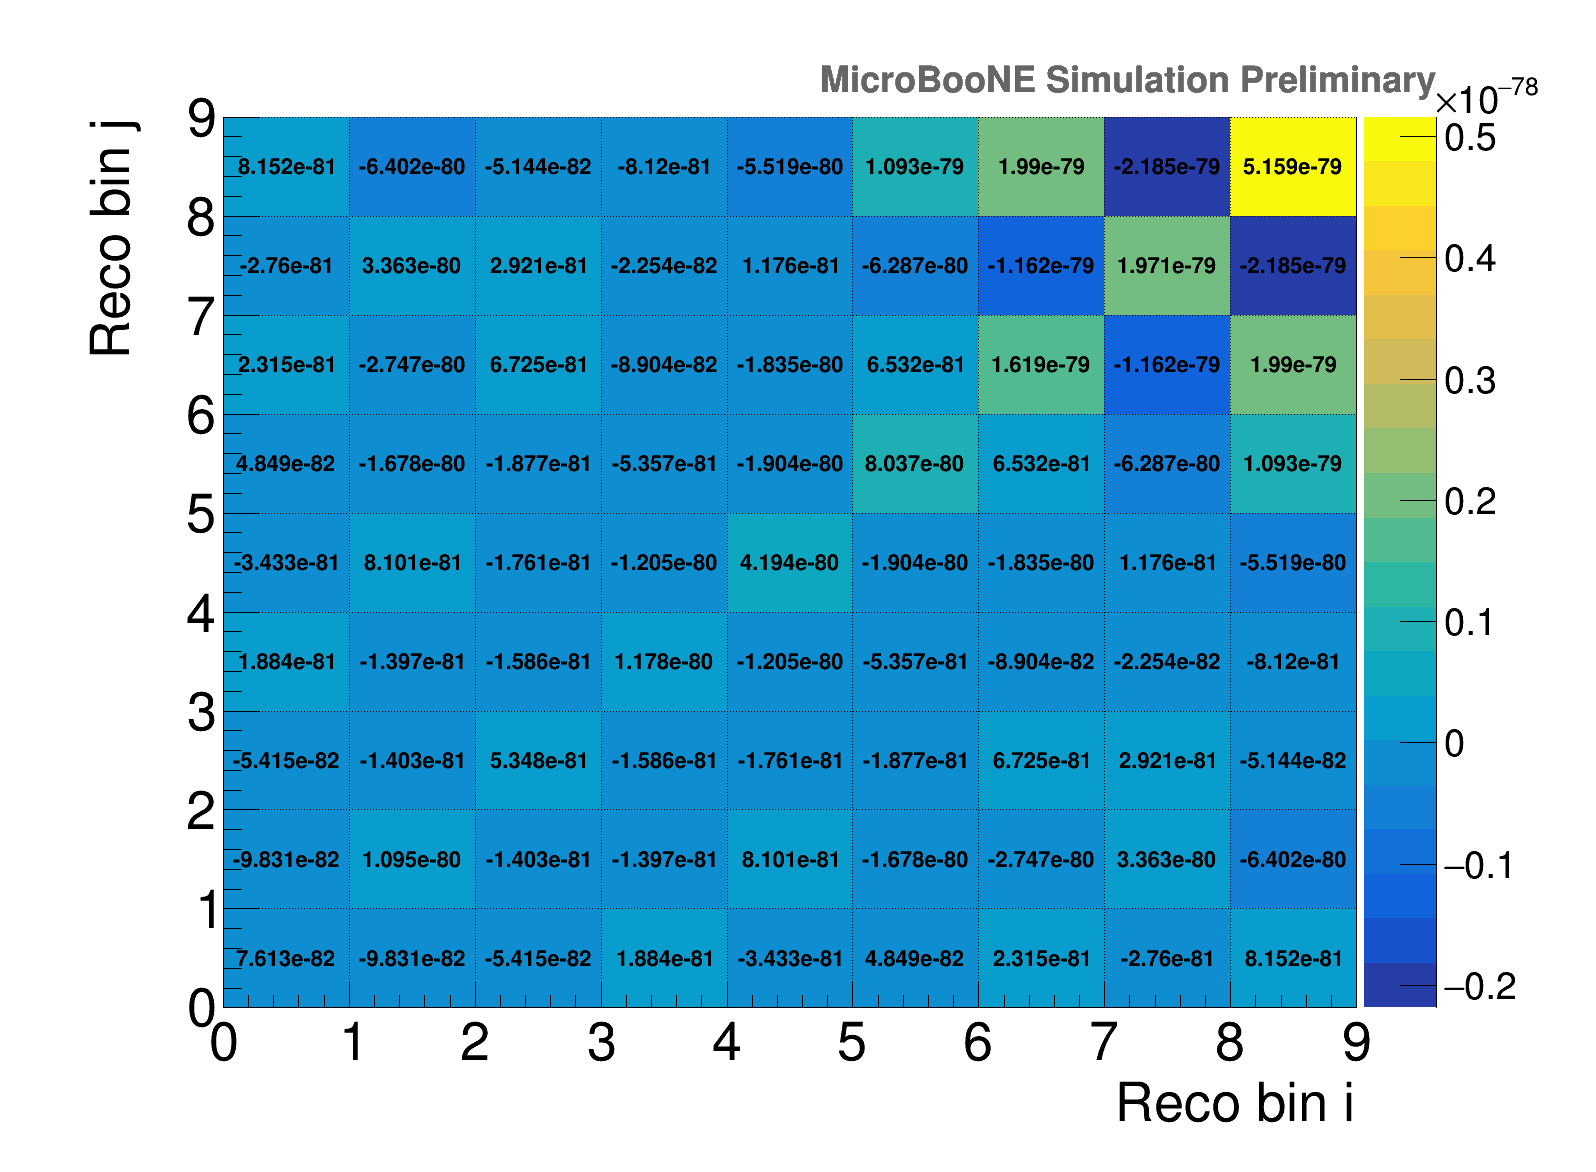

In [44]:
ROOT.gStyle.SetPaintTextFormat('0.3g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix',9,0,9,9,0,9)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.15)
ROOT.gStyle.SetPaintTextFormat('0.4g')
h_covariance.Draw('colz')
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_theta_detsys.png")
c1.SaveAs(outputdir_root + "h_covariance_theta_detsys.root")
c1.SaveAs(outputdir_pdf + "h_covariance_theta_detsys.pdf")
h_covariance.Write('h_covariance')

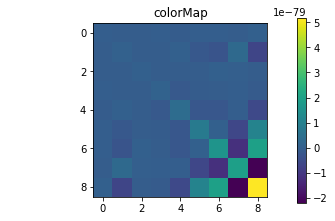

In [45]:
fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(xsec_cov_matrix)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show() 

In [46]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_eff_tilde_theta_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_eff_tilde_theta_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_eff_tilde_theta_detsys.pdf has been created


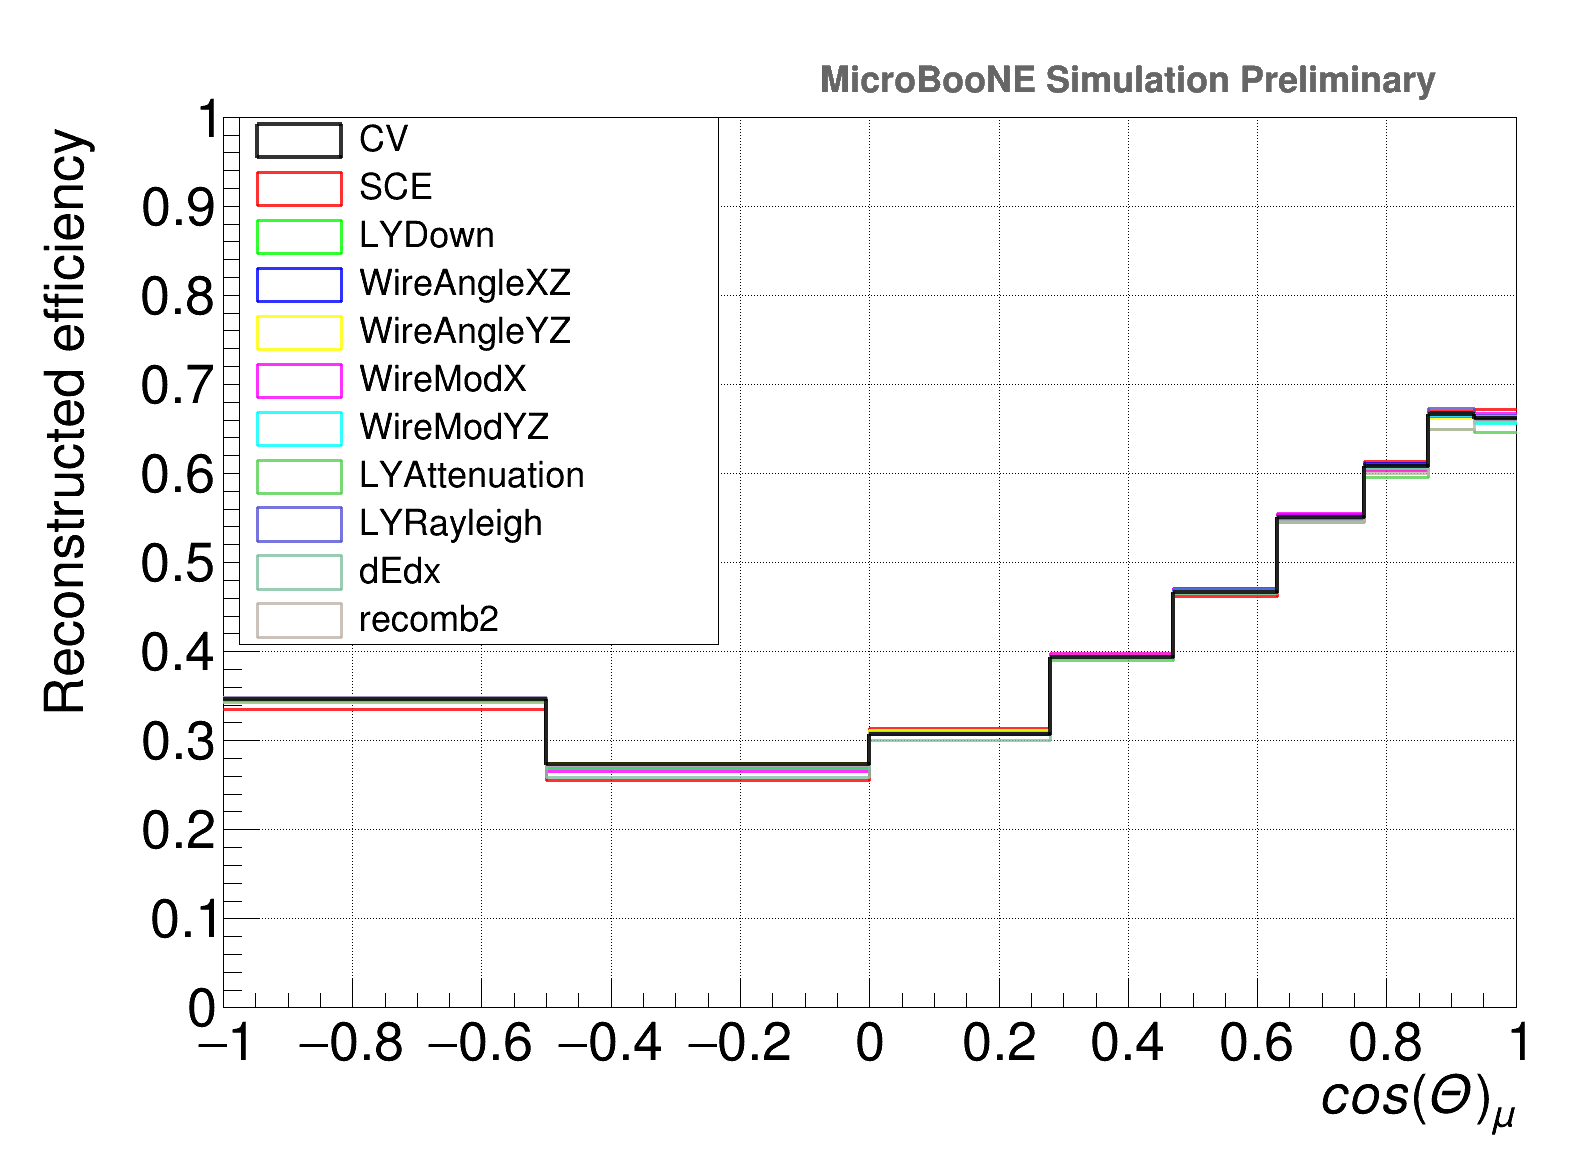

In [47]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
del h_files[:]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_eff_theta_tilde'))
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetYTitle("Reconstructed efficiency")
        #h_files[i].SetXTitle("p_{\mu} \quad [GeV]")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        #h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].SetYTitle("Reconstructed efficiency")
        #h_files[i].SetXTitle("p_{\mu} \quad [GeV]")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        h_files[i].Draw("hist same")
    i+=1
h_files[0].Draw("hist same")
legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_theta_detsys.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_theta_detsys.root")
c1.SaveAs(outputdir_pdf + "h_eff_tilde_theta_detsys.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_eff_true_theta_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_eff_true_theta_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_eff_true_theta_detsys.pdf has been created


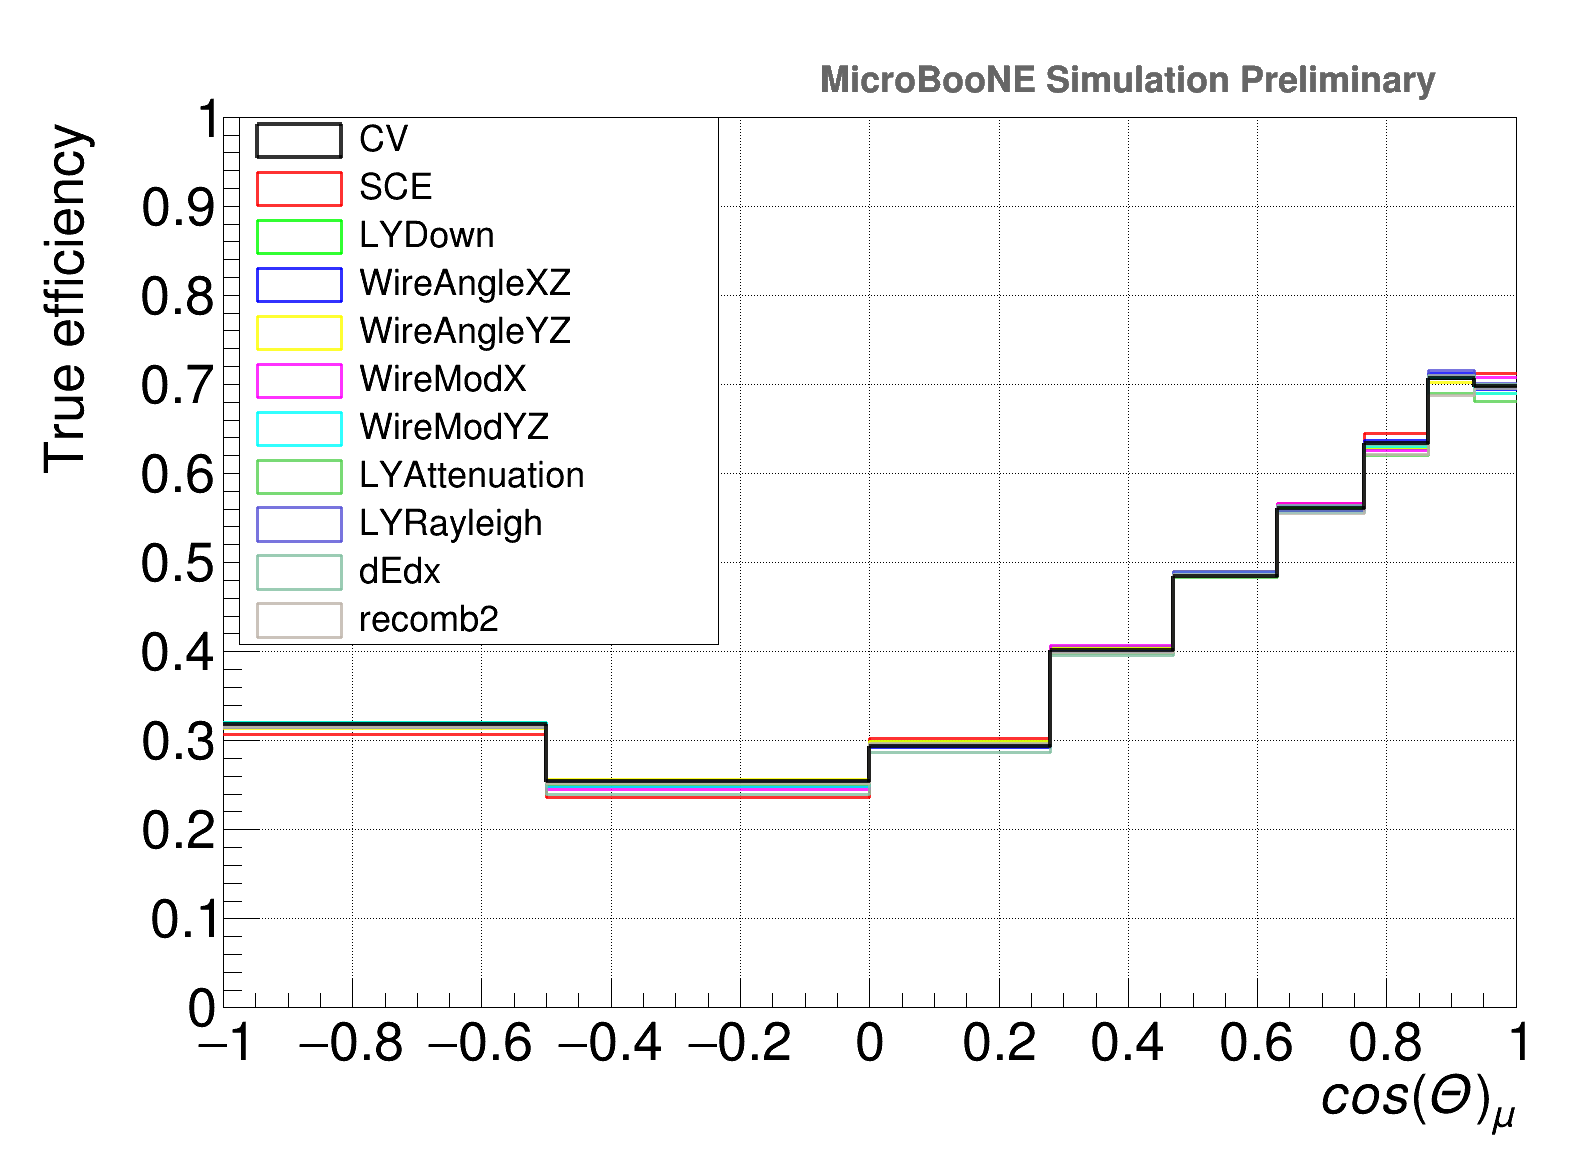

In [48]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
#del h_files_z[:]
#del h_files_n[:]
del h_files[:]
h_files_z = []
h_files_n = []
h_files = []

i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files_z.append(x.Get('h_eff_true_theta_z'))
    h_files_n.append(x.Get('h_eff_true_theta_n'))
    h_files.append(h_files_z[i])
    h_files[i].Divide(h_files_n[i])
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    h_files[i].SetLineWidth(3)
    h_files[i].SetMaximum(1)
    h_files[i].SetMinimum(0)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetYTitle("True efficiency")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        #h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
        h_files[i].SetYTitle("Reconstructed efficiency")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        #h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
    i+=1
h_files[0].Draw("hist same")
legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_true_theta_detsys.png")
c1.SaveAs(outputdir_root + "h_eff_true_theta_detsys.root")
c1.SaveAs(outputdir_pdf + "h_eff_true_theta_detsys.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_overlay_theta_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_overlay_theta_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_overlay_theta_detsys.pdf has been created


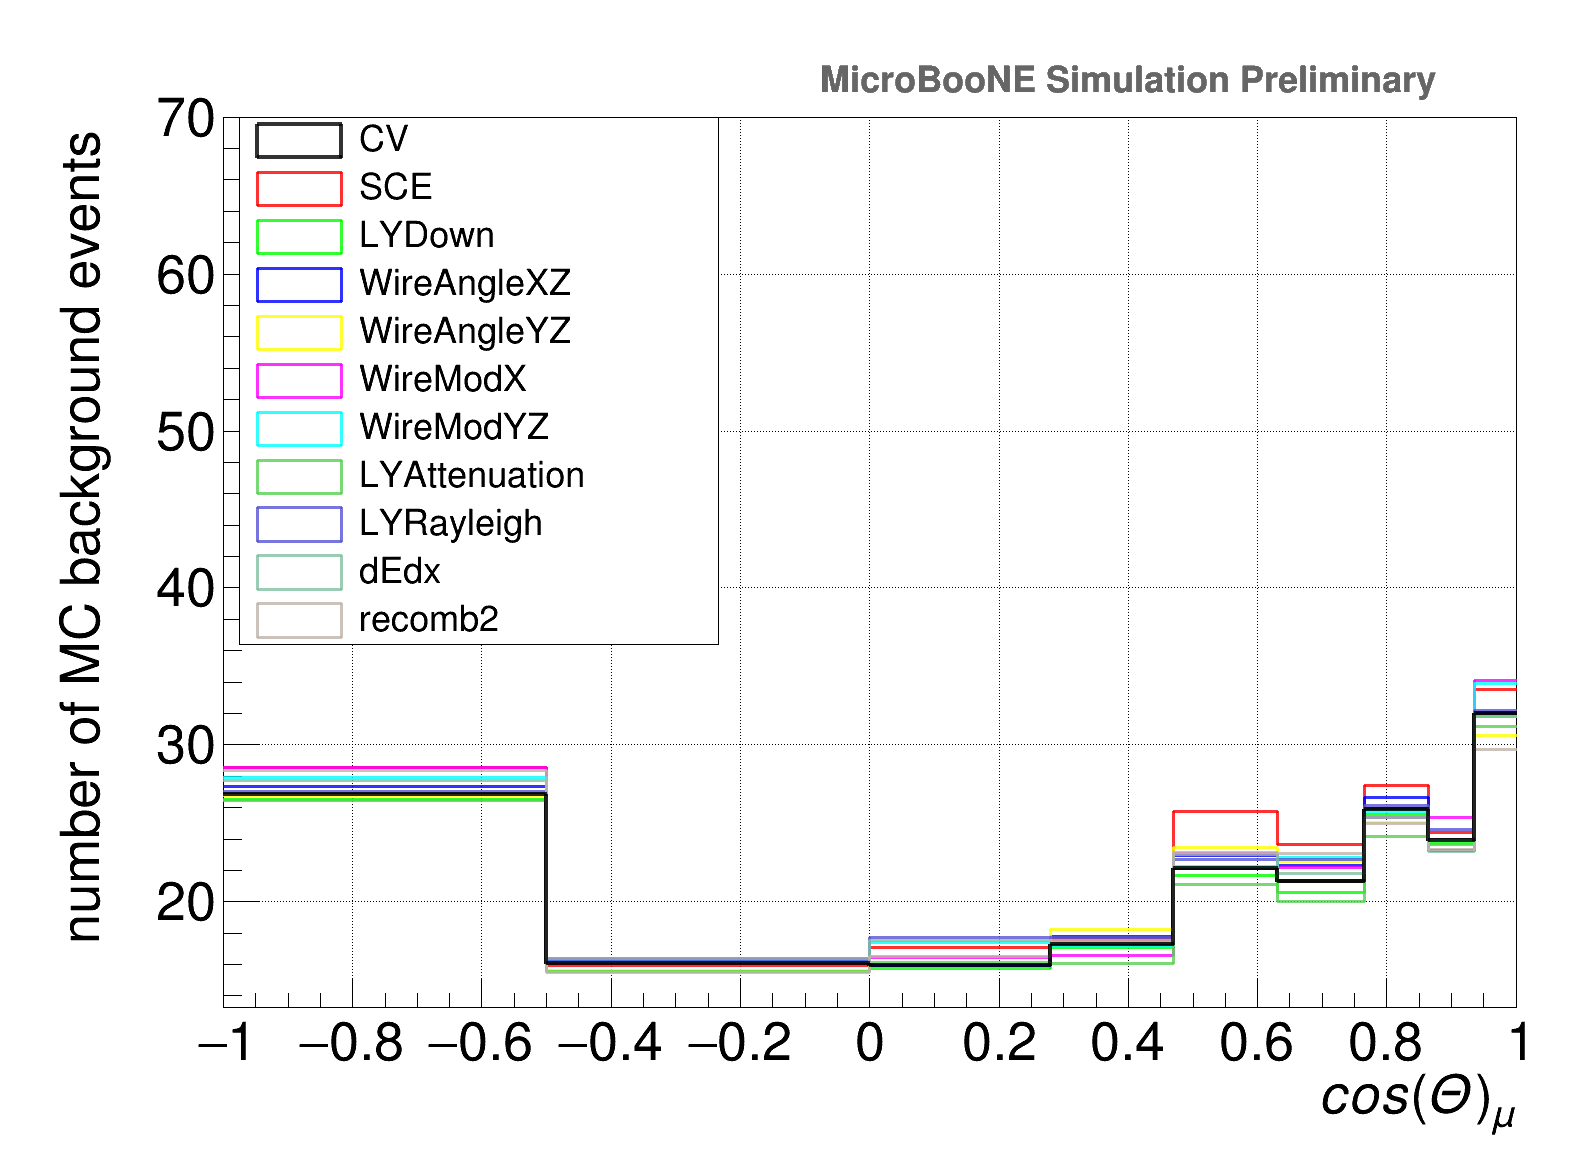

In [49]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
del h_files[:]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_overlay_theta'))
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    h_files[i].SetLineWidth(3)
    #h_files[i].SetMaximum(1)
    #h_files[i].SetMinimum(0)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetMaximum(70)
        h_files[i].SetYTitle("number of MC background events")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        #h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].SetMaximum(70)
        h_files[i].Draw("hist same")
        h_files[i].SetYTitle("number of MC background events")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        #h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
    i+=1
h_files[0].Draw("hist same")
legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_overlay_theta_detsys.png")
c1.SaveAs(outputdir_root + "h_overlay_theta_detsys.root")
c1.SaveAs(outputdir_pdf + "h_overlay_theta_detsys.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_xsec_detsys_theta_stat.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_xsec_detsys_theta_stat.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_xsec_detsys_theta_stat.pdf has been created


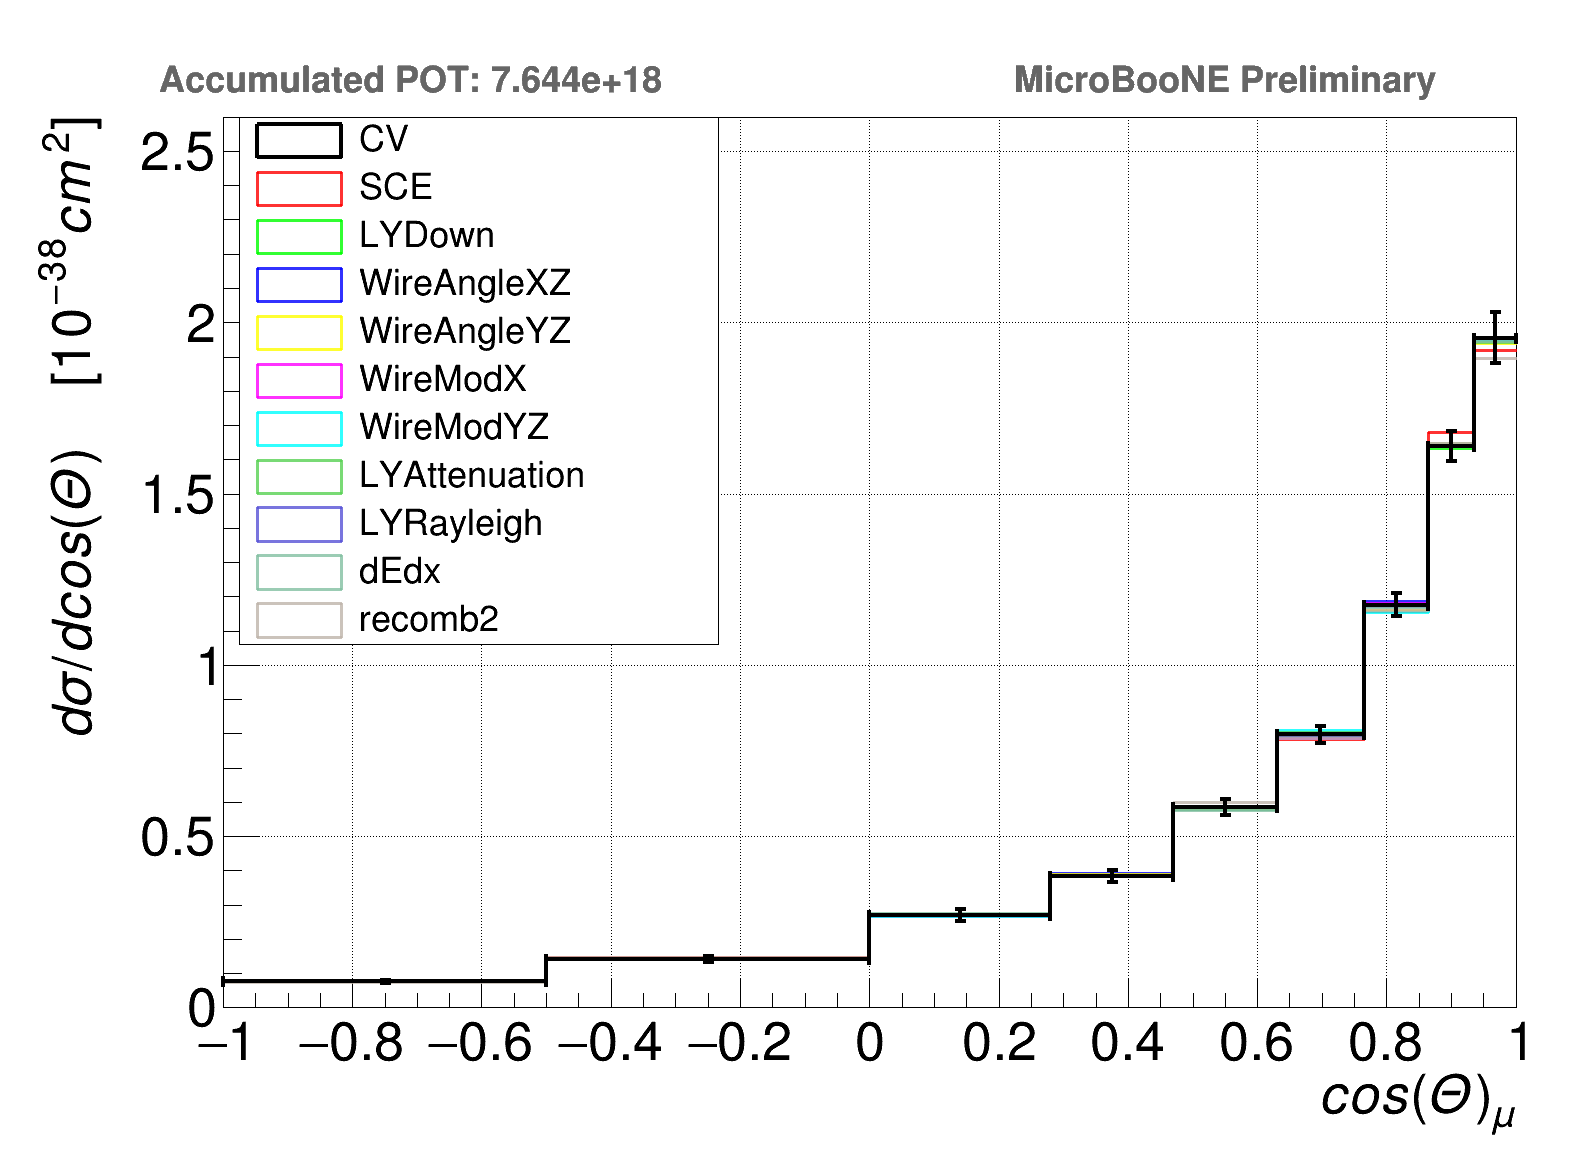

In [50]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_MC_theta'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(2.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [10^{-38} cm^2]")
    h_files[i].SetXTitle("cos(\Theta)_{\mu}")
    if i == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
#for i in range(1,h_files[0].GetNbinsX()+1):
#    h_files[0].SetBinError(i,h_files[0].GetBinError(i)+math.sqrt(h_covariance.GetBinContent(i,i)))
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("hist E1 same")
h_stat = h_files[0].Clone()
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_theta_stat.png")
c1.SaveAs(outputdir_root + "h_xsec_detsys_theta_stat.root")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_theta_stat.pdf")

#h_files.clear()

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_xsec_detsys_theta_all_wError.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_xsec_detsys_theta_all_wError.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_xsec_detsys_theta_all_wError.pdf has been created


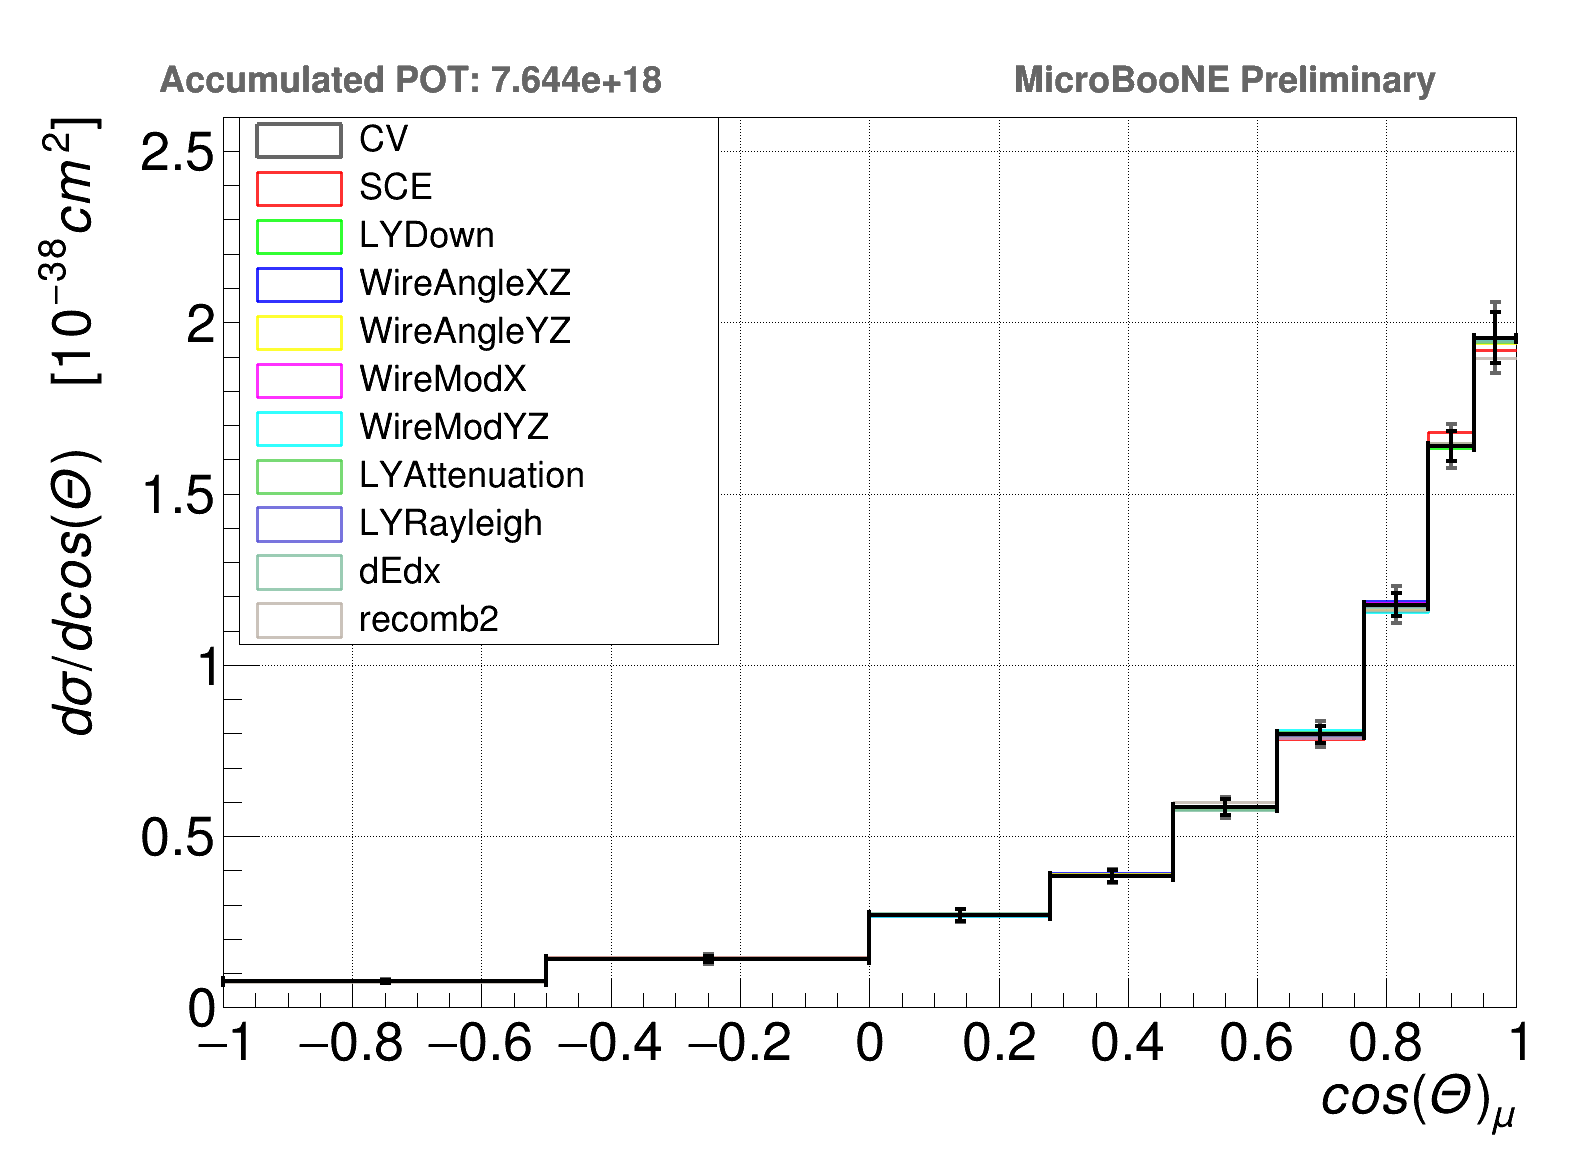

In [51]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_MC_theta'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(2.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [10^{-38} cm^2]")
    h_files[i].SetXTitle("cos(\Theta)_{\mu}")
    if i == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
for i in range(1,h_files[0].GetNbinsX()+1):
    #print h_files[0].GetBinError(i)
    h_files[0].SetBinError(i,math.sqrt(math.pow(h_files[0].GetBinError(i),2)+h_covariance.GetBinContent(i,i)*1e76))
    #h_files[0].SetBinError(i,h_files[0].GetBinError(i)+math.sqrt(h_covariance.GetBinContent(i,i))*1e38)
h_files[0].SetLineColor(ROOT.kGray+2)
h_files[0].Draw("E1 same")
h_stat.SetLineColor(ROOT.kBlack)
h_stat.SetMarkerSize(0.9)
h_stat.Draw('hist E1 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_theta_all_wError.png")
c1.SaveAs(outputdir_root + "h_xsec_detsys_theta_all_wError.root")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_theta_all_wError.pdf")

#h_files.clear()

0.00275910382637
0.0104630882671
0.00731314595475
0.0108528600933
0.0204802421136
0.0283494348885
0.0402378533236
0.0443970855393
0.0718275281162


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/png/h_xsec_detsys_theta_errdetsys_only.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/root/h_xsec_detsys_theta_errdetsys_only.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all_MC/pdf/h_xsec_detsys_theta_errdetsys_only.pdf has been created


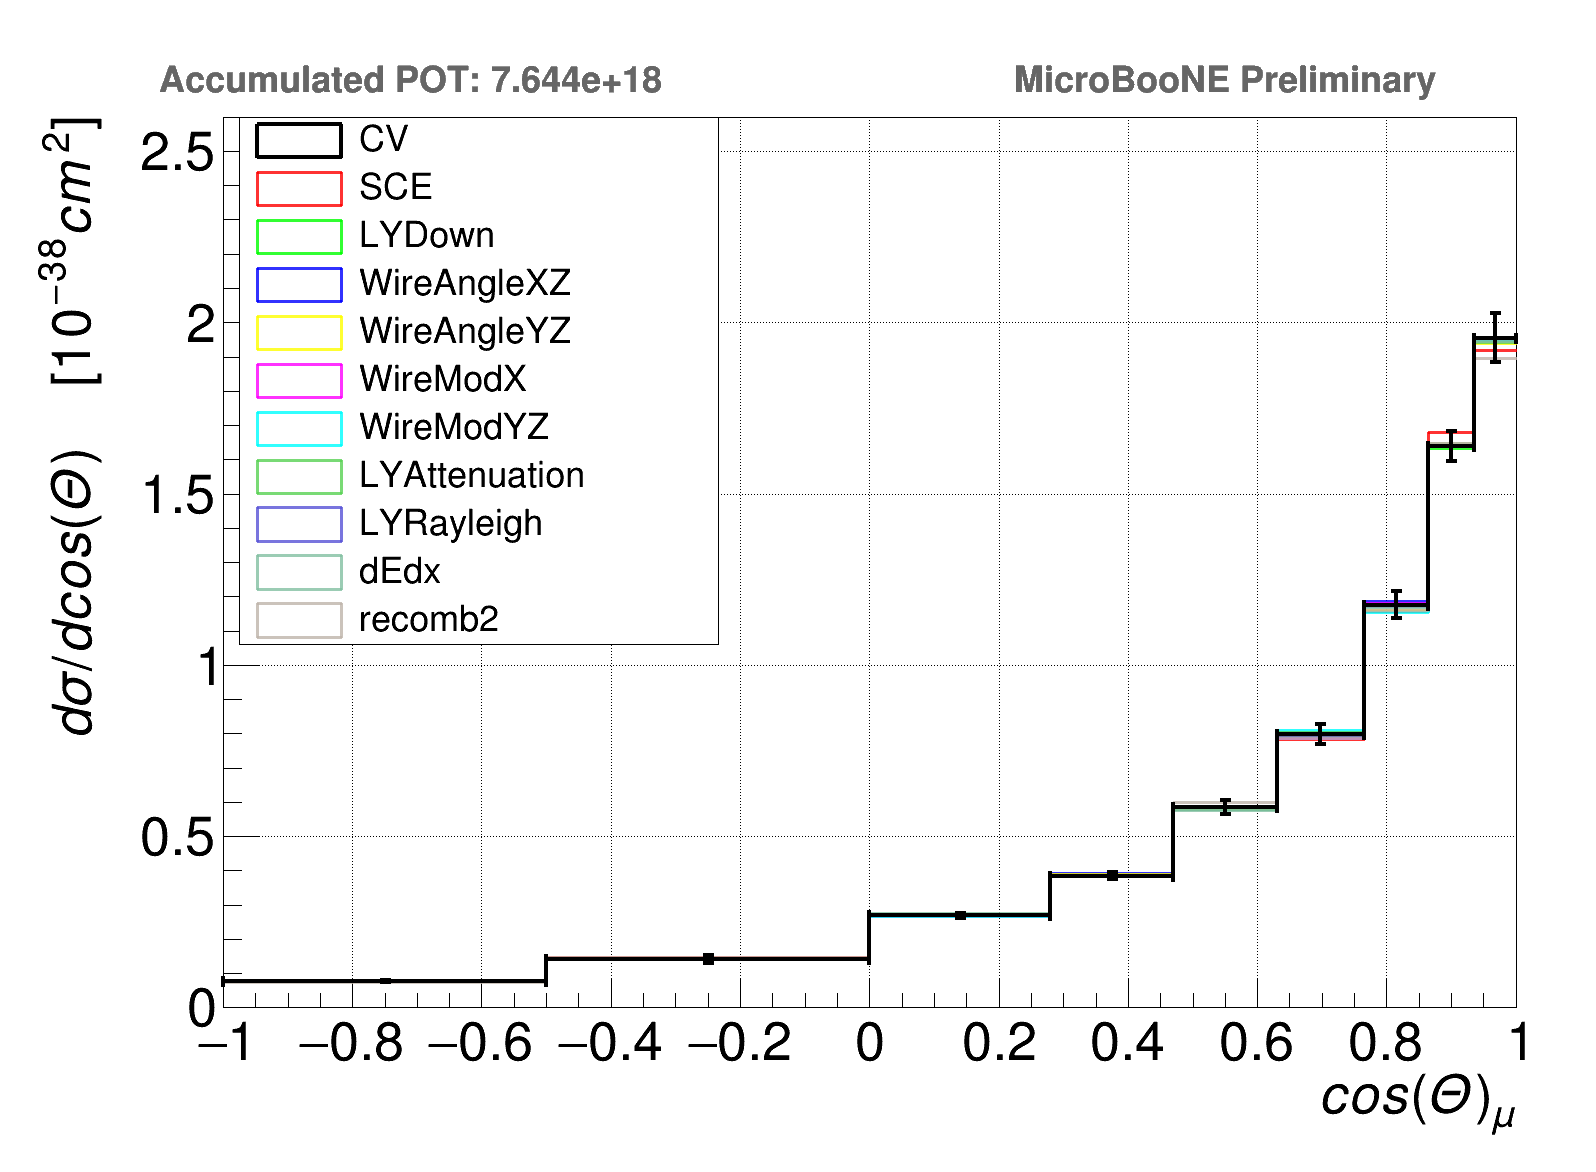

In [52]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_MC_theta'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(2.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [10^{-38} cm^2]")
    h_files[i].SetXTitle("cos(\Theta)_{\mu}")
    if i == 0:
        for j in range(1,h_files[0].GetNbinsX()+1):
            h_files[0].SetBinError(j,math.sqrt(h_covariance.GetBinContent(j,j)*1e76))
            print h_files[0].GetBinError(j)
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('E1')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("E1 hist same")
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_theta_errdetsys_only.png")
c1.SaveAs(outputdir_root + "h_xsec_detsys_theta_errdetsys_only.root")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_theta_errdetsys_only.pdf")

#h_files.clear()

In [53]:
RootFile_theta.Close()